In [2]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
plt.rc('font', family='nanumgothic')
plt.rc('axes', unicode_minus=False)
# 한글 폰트 세팅

In [16]:
fr = pd.read_csv("raw_data_87.csv")

In [18]:
fr.shape

(16469, 410)

In [22]:
fr.head()

,Q1,Q2A1,Q2A2,Q2A3,Q2A4,Q2A5,Q2_1,Q3A1,Q3A2,Q3A3,...,D_COU,D_GEN,D_AGE,D_Q5_1,D_Q13,D_Q1,DD_Q1,WT,COUNTRY,CITY
0,1,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,13.0,1.0,3.0,1.0,1.0,1.0,1.0,0.26,12,1513
1,1,2.0,NaN,NaN,NaN,NaN,4.0,1.0,NaN,NaN,...,2.0,1.0,5.0,1.0,1.0,1.0,1.0,1.50,2,204
2,6,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,2.0,2.0,2.0,1.0,1.0,4.0,2.0,1.81,2,211
3,2,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.61,2,253
4,3,3.0,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,...,2.0,2.0,3.0,1.0,1.0,3.0,2.0,1.87,2,201


In [ ]:
# Q5_1, Q6_1A1, Q5_2A1, Q13

In [20]:
# D_MON + '-' + ID 일련번호 새로운 변수(newID) 만들기
fr['newID'] = fr['D_MON'].astype('int').astype('str') + '-' + fr['ID'].astype('str')

In [21]:
fr.head()

,Q1,Q2A1,Q2A2,Q2A3,Q2A4,Q2A5,Q2_1,Q3A1,Q3A2,Q3A3,...,D_GEN,D_AGE,D_Q5_1,D_Q13,D_Q1,DD_Q1,WT,COUNTRY,CITY,newID
0,1,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,1.0,3.0,1.0,1.0,1.0,1.0,0.26,12,1513,1-1
1,1,2.0,NaN,NaN,NaN,NaN,4.0,1.0,NaN,NaN,...,1.0,5.0,1.0,1.0,1.0,1.0,1.50,2,204,2-1
2,6,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,2.0,2.0,1.0,1.0,4.0,2.0,1.81,2,211,3-1
3,2,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,2.0,2.0,1.0,1.0,2.0,2.0,1.61,2,253,4-1
4,3,3.0,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,...,2.0,3.0,1.0,1.0,3.0,2.0,1.87,2,201,5-1


In [27]:
fr2 = fr.loc[:,['newID','Q9_2A1','Q10_5A1','Q11A1']]

In [19]:
fr1 = fr[fr['D_Q13'] == 1]

In [ ]:
# D_MON + '-' + ID 일련번호 새로운 변수(newID) 만들기
fr1['newID'] = fr1['D_MON'].astype('int').astype('str') + '-' + fr['ID'].astype('str')

In [42]:
fr2 = fr1.loc[:,['newID', 'Q5_1', 'Q6_1A1', 'Q5_2A1', 'Q13']]

In [43]:
fr2.head()

,newID,Q5_1,Q6_1A1,Q5_2A1,Q13
0,1-1,1,5,1.0,1
1,2-1,1,6,3.0,1
2,3-1,1,2,8.0,1
3,4-1,1,11,2.0,1
4,5-1,1,6,1.0,1


In [45]:
fr2.isnull().sum()

newID        0
Q5_1         0
Q6_1A1       0
Q5_2A1    3935
Q13          0
dtype: int64

In [46]:
fr2 = fr2.fillna(0)

In [48]:
fr2.head()

,newID,Q5_1,Q6_1A1,Q5_2A1,Q13
0,1-1,1,5,1.0,1
1,2-1,1,6,3.0,1
2,3-1,1,2,8.0,1
3,4-1,1,11,2.0,1
4,5-1,1,6,1.0,1


In [49]:
writer = pd.ExcelWriter('df_dj.xlsx', engine='xlsxwriter')

In [50]:
fr2.to_excel(writer, sheet_name='Sheet1')

In [51]:
writer.close()

In [34]:
dj = pd.read_csv("data_dj.csv")

In [39]:
dj.shape

(16469, 5)

In [20]:
ttrain = pd.read_csv("ttrain.csv")
ttrain.head()

,Unnamed: 0,Q1,Q2_1,Q5_1,Q5_2A1,Q6_1A1,Q6_3A1,Q8A1,Q10_1A1,Q10_1A2,...,Q10_1A16,Q10_1A17,Q10_3A1,Q13,Q19,D_COU,D_GEN,D_AGE,D_MON,cluster
0,11-3412,2,4,1,4,1,6,1,1,1,...,0,0,5,1,9090.0,6,1,2,11,1
1,3-1278,10,2,1,9,1,7,1,1,0,...,0,0,1,1,0.0,1,2,2,3,2
2,2-1864,5,0,2,0,11,2,1,0,0,...,0,0,5,1,0.0,1,1,3,2,3
3,11-1822,1,3,1,5,4,5,2,1,0,...,1,0,7,3,38288.0,7,1,5,11,4
4,4-620,1,2,1,1,1,1,1,1,0,...,0,0,6,1,0.0,10,2,2,4,2


In [22]:
ttrain.shape

(11528, 33)

In [3]:
train = ttrain.copy()

In [4]:
train.head()

,Unnamed: 0,Q1,Q2_1,Q5_1,Q5_2A1,Q6_1A1,Q6_3A1,Q8A1,Q10_1A1,Q10_1A2,...,Q10_1A16,Q10_1A17,Q10_3A1,Q13,Q19,D_COU,D_GEN,D_AGE,D_MON,cluster
0,11-3412,2,4,1,4,1,6,1,1,1,...,0,0,5,1,9090.0,6,1,2,11,1
1,3-1278,10,2,1,9,1,7,1,1,0,...,0,0,1,1,0.0,1,2,2,3,2
2,2-1864,5,0,2,0,11,2,1,0,0,...,0,0,5,1,0.0,1,1,3,2,3
3,11-1822,1,3,1,5,4,5,2,1,0,...,1,0,7,3,38288.0,7,1,5,11,4
4,4-620,1,2,1,1,1,1,1,1,0,...,0,0,6,1,0.0,10,2,2,4,2


In [5]:
train['cluster'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [6]:
X_train = train.drop(['Unnamed: 0', 'cluster'], axis=1)
y_train = train.cluster

In [7]:
X_train.head()

,Q1,Q2_1,Q5_1,Q5_2A1,Q6_1A1,Q6_3A1,Q8A1,Q10_1A1,Q10_1A2,Q10_1A3,...,Q10_1A15,Q10_1A16,Q10_1A17,Q10_3A1,Q13,Q19,D_COU,D_GEN,D_AGE,D_MON
0,2,4,1,4,1,6,1,1,1,1,...,0,0,0,5,1,9090.0,6,1,2,11
1,10,2,1,9,1,7,1,1,0,0,...,0,0,0,1,1,0.0,1,2,2,3
2,5,0,2,0,11,2,1,0,0,0,...,0,0,0,5,1,0.0,1,1,3,2
3,1,3,1,5,4,5,2,1,0,0,...,0,1,0,7,3,38288.0,7,1,5,11
4,1,2,1,1,1,1,1,1,0,0,...,0,0,0,6,1,0.0,10,2,2,4


In [8]:
X_train.columns

Index(['Q1', 'Q2_1', 'Q5_1', 'Q5_2A1', 'Q6_1A1', 'Q6_3A1', 'Q8A1', 'Q10_1A1',
       'Q10_1A2', 'Q10_1A3', 'Q10_1A4', 'Q10_1A5', 'Q10_1A6', 'Q10_1A7',
       'Q10_1A8', 'Q10_1A9', 'Q10_1A10', 'Q10_1A11', 'Q10_1A12', 'Q10_1A13',
       'Q10_1A14', 'Q10_1A15', 'Q10_1A16', 'Q10_1A17', 'Q10_3A1', 'Q13', 'Q19',
       'D_COU', 'D_GEN', 'D_AGE', 'D_MON'],
      dtype='object')

In [10]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=0, objective = 'multi:softmax')

In [11]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(xgb, X_train, y_train, cv=5)
print('{}\nmean = {:.5f}\nstd = {:.5f}'.format(score, score.mean(), score.std()))

[0.9220104  0.91460772 0.93061578 0.93058568 0.92571677]
mean = 0.92471
std = 0.00600


In [13]:
#y_train = np.array(y_train)
#y_train

In [14]:
#from sklearn.preprocessing import label_binarize
#y_train = label_binarize(y_train, classes=[1, 2, 3, 4, 5, 6])
#y_train

In [12]:
x_tr, x_ts, y_tr, y_ts = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

In [13]:
y_ts

9641     1
8362     3
11112    2
487      3
11442    1
154      5
2224     3
4881     4
6730     3
5094     5
2774     3
1550     4
4197     3
9291     4
10580    3
6233     5
7031     2
930      1
1035     3
6511     2
9827     1
4392     2
11260    5
10602    3
7571     5
1585     1
5978     5
7815     4
6971     4
8049     2
        ..
9507     5
10388    2
2499     2
11269    5
5475     2
2519     2
6304     2
629      3
1249     3
7767     4
1571     1
1223     5
544      2
643      2
7481     5
7291     3
1690     1
6578     1
6804     3
866      1
5573     1
6413     5
9076     6
787      5
2048     2
3641     3
4447     4
11404    4
9506     4
347      5
Name: cluster, Length: 3459, dtype: int64

In [14]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=0, objective = 'multi:softmax')
xgb.fit(x_tr, y_tr)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [15]:
y_pred = xgb.predict(x_ts)

In [16]:
y_pred

array([1, 3, 5, ..., 4, 4, 5], dtype=int64)

In [17]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [18]:
accuracy_score(y_ts, y_pred)

0.9274356750505927

In [24]:
from sklearn.model_selection import RandomizedSearchCV

parameters= {
        'silent': [False],
        'max_depth': [6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [100]}

model = RandomizedSearchCV(xgb, param_distributions = parameters, n_iter=15, random_state=2, n_jobs=1)
model.fit(x_tr, y_tr)
print(model.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
       colsample_bytree=1.0, gamma=0.25, learning_rate=0.2,
       max_delta_step=0, max_depth=10, min_child_weight=0.5, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=10.0, scale_pos_weight=1, seed=None, silent=False,
       subsample=0.6)


In [25]:
clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
       colsample_bytree=1.0, gamma=0.25, learning_rate=0.2,
       max_delta_step=0, max_depth=10, min_child_weight=0.5, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=10.0, scale_pos_weight=1, seed=None, silent=False,
       subsample=0.6)

In [26]:
clf.fit(x_tr, y_tr)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
       colsample_bytree=1.0, gamma=0.25, learning_rate=0.2,
       max_delta_step=0, max_depth=10, min_child_weight=0.5, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=10.0, scale_pos_weight=1, seed=None, silent=False,
       subsample=0.6)

In [27]:
y_pred = clf.predict(x_ts)

In [30]:
accuracy_score(y_ts, y_pred)

0.9303266840127205

In [34]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_ts, y_pred)

array([[373,   2,   3,   3,  16,   3],
       [  7, 560,   0,  10,  51,   3],
       [  2,   0, 858,   0,   6,   0],
       [  3,   3,   7, 439,  13,   0],
       [ 25,  33,   3,  29, 836,   5],
       [  5,   0,   1,   6,   2, 152]], dtype=int64)

In [35]:
train['cluster'].value_counts()

5    3094
3    2914
2    2046
4    1622
1    1304
6     548
Name: cluster, dtype: int64

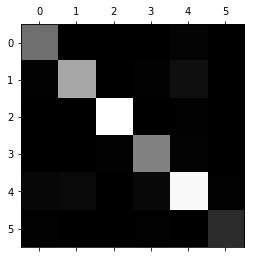

In [37]:
plt.matshow(confusion_matrix(y_ts, y_pred), cmap = plt.cm.gray)
plt.show()

In [20]:
test = pd.read_csv("test.csv")

In [21]:
test.head()

,Unnamed: 0,newID,ID,D_MON,Q6_3A1,Q8A1,Q9_2A1,Q10_1A1,Q10_1A2,Q10_1A3,...,I_Q_14_2_7,GA_Q14_1T,GA_Q14_2_3,GA_Q14_2_4,GA_Q14_2_5,GA_Q14_2_7,Q19,D_COU,D_GEN,D_AGE
0,44,9-4,4,9,1,9,3,1.0,0.0,0.0,...,0.0,0.0,292.4,73.1,0.0,0.0,29240.0,2.0,1.0,5.0
1,7926,4-1219,1219,4,5,1,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,4.0
2,1290,6-204,204,6,4,1,1,1.0,0.0,0.0,...,0.0,0.0,2000.0,0.0,0.0,0.0,0.0,19.0,2.0,5.0
3,3641,10-446,446,10,1,1,2,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3100.0,6.0,2.0,3.0
4,4787,11-660,660,11,6,1,7,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2.0,5.0


In [50]:
total = pd.read_csv("foreign_raw_data.csv")

In [51]:
total.shape

(16469, 31)

In [52]:
total.head()

,Q1,Q2_1,Q5_1,Q5_2A1,Q6_1A1,Q6_3A1,Q8A1,Q10_1A1,Q10_1A2,Q10_1A3,...,Q10_1A15,Q10_1A16,Q10_1A17,Q10_3A1,Q13,Q19,D_COU,D_GEN,D_AGE,D_MON
0,1,0,1,1,5,5,1,1,0,0,...,0,0,0,7,1,0.0,13,1,3,1
1,1,4,1,3,6,2,8,1,0,0,...,0,0,0,3,1,31720.0,2,1,5,2
2,6,0,1,8,2,3,2,1,0,0,...,0,0,0,3,1,15750.0,2,2,2,3
3,2,0,1,2,11,1,6,1,0,0,...,0,0,0,13,1,7975.0,2,2,2,4
4,3,2,1,1,6,3,2,1,0,0,...,0,0,0,4,1,235950.0,2,2,3,5


In [53]:
x_tr, x_ts = train_test_split(total, test_size=0.3)

In [54]:
x_tr.to_csv("x_tr.csv", index = False)

In [55]:
x_ts.to_csv("x_ts.csv", index = False)

In [56]:
df7 = pd.read_csv("new_real.csv")

In [57]:
df7.head()

,Q1,Q2_1,Q5_1,Q5_2A1,Q6_1A1,Q6_3A1,Q8A1,Q10_1A1,Q10_1A2,Q10_1A3,...,Q10_1A16,Q10_1A17,Q10_3A1,Q13,Q19,D_COU,D_GEN,D_AGE,D_MON,cluster
0,10,0,1,2,6,1,1,1,0,0,...,0,0,8,1,0.0,15,2,2,7,1
1,1,2,1,9,2,5,1,1,0,0,...,0,0,5,1,0.0,9,2,3,10,2
2,1,4,1,1,6,3,1,1,0,0,...,0,0,4,1,0.0,10,2,5,11,2
3,1,0,2,0,11,7,1,1,0,0,...,0,0,7,1,383950.0,10,1,3,8,3
4,2,0,1,5,1,1,1,1,0,0,...,0,0,9,1,0.0,15,2,3,8,1


In [58]:
df7.shape

(11528, 32)

In [59]:
df = df7.drop('cluster', axis = 1)
y = df7.cluster

In [60]:
df.head(20)

,Q1,Q2_1,Q5_1,Q5_2A1,Q6_1A1,Q6_3A1,Q8A1,Q10_1A1,Q10_1A2,Q10_1A3,...,Q10_1A15,Q10_1A16,Q10_1A17,Q10_3A1,Q13,Q19,D_COU,D_GEN,D_AGE,D_MON
0,10,0,1,2,6,1,1,1,0,0,...,0,0,0,8,1,0.0,15,2,2,7
1,1,2,1,9,2,5,1,1,0,0,...,0,0,0,5,1,0.0,9,2,3,10
2,1,4,1,1,6,3,1,1,0,0,...,0,0,0,4,1,0.0,10,2,5,11
3,1,0,2,0,11,7,1,1,0,0,...,0,0,0,7,1,383950.0,10,1,3,8
4,2,0,1,5,1,1,1,1,0,0,...,0,0,0,9,1,0.0,15,2,3,8
5,1,3,1,2,6,1,1,0,1,0,...,0,0,0,3,3,9750.0,3,1,4,12
6,1,2,1,13,8,1,3,1,0,0,...,0,0,0,0,1,54000.0,9,2,3,7
7,2,4,1,1,1,3,1,1,0,0,...,0,0,0,3,3,12760.0,6,1,4,2
8,1,0,2,0,5,2,2,1,0,0,...,0,0,0,7,1,0.0,11,1,4,11
9,1,2,1,1,6,1,1,1,0,0,...,0,0,0,13,1,150000.0,9,2,5,5


In [61]:
x_tr, x_ts, y_tr, y_ts = train_test_split(df, y, test_size=0.3, random_state=0)

In [68]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_tr, y_tr)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [69]:
y_pred = xgb.predict(x_ts)

In [70]:
accuracy_score(y_ts, y_pred)

0.9317721884937843

In [71]:
xgb = XGBClassifier()

In [73]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(xgb, x_tr, y_tr, cv=5)
print('{}\nmean = {:.5f}\nstd = {:.5f}'.format(score, score.mean(), score.std()))

[0.92141089 0.91511772 0.91759603 0.91263941 0.9255121 ]
mean = 0.91846
std = 0.00457


In [74]:
df7 = pd.read_csv("sample_70.csv")

In [75]:
df7.head()

,Unnamed: 0,Q1,Q2_1,Q5_1,Q5_2A1,Q6_1A1,Q6_3A1,Q8A1,Q10_1A1,Q10_1A2,...,Q10_1A16,Q10_1A17,Q10_3A1,Q13,Q19,D_COU,D_GEN,D_AGE,D_MON,cluster
0,1-292,1,0,2,0,6,1,1,1,0,...,0,0,5,1,0.0,11,1,4,1,1
1,11-5037,1,3,1,3,3,3,1,0,0,...,1,0,3,1,51040.0,5,2,5,11,2
2,10-19,8,0,1,2,1,8,1,1,0,...,0,0,4,1,14530.0,2,2,2,10,3
3,8-2022,1,5,1,2,6,2,2,1,0,...,0,0,5,1,32700.0,5,1,5,8,3
4,4-687,1,0,2,0,2,1,1,1,0,...,0,0,11,2,0.0,16,1,2,4,1


In [76]:
df = df7.drop('Unnamed: 0', axis = 1)

In [77]:
X = df.drop('cluster', axis = 1)

In [78]:
y = df.cluster

In [79]:
x_tr, x_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.3, random_state=0)

In [80]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_tr, y_tr)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [81]:
y_pred = xgb.predict(x_ts)

In [82]:
accuracy_score(y_ts, y_pred)

0.9354545454545454

In [83]:
ttrain.head()

,Unnamed: 0,Q1,Q2_1,Q5_1,Q5_2A1,Q6_1A1,Q6_3A1,Q8A1,Q10_1A1,Q10_1A2,...,Q10_1A16,Q10_1A17,Q10_3A1,Q13,Q19,D_COU,D_GEN,D_AGE,D_MON,cluster
0,11-3412,2,4,1,4,1,6,1,1,1,...,0,0,5,1,9090.0,6,1,2,11,1
1,3-1278,10,2,1,9,1,7,1,1,0,...,0,0,1,1,0.0,1,2,2,3,2
2,2-1864,5,0,2,0,11,2,1,0,0,...,0,0,5,1,0.0,1,1,3,2,3
3,11-1822,1,3,1,5,4,5,2,1,0,...,1,0,7,3,38288.0,7,1,5,11,4
4,4-620,1,2,1,1,1,1,1,1,0,...,0,0,6,1,0.0,10,2,2,4,2


In [85]:
ttrain.cluster.value_counts()

5    3094
3    2914
2    2046
4    1622
1    1304
6     548
Name: cluster, dtype: int64

In [102]:
tot = ttrain.columns.astype('str')

In [103]:
tot

Index(['Unnamed: 0', 'Q1', 'Q2_1', 'Q5_1', 'Q5_2A1', 'Q6_1A1', 'Q6_3A1',
       'Q8A1', 'Q10_1A1', 'Q10_1A2', 'Q10_1A3', 'Q10_1A4', 'Q10_1A5',
       'Q10_1A6', 'Q10_1A7', 'Q10_1A8', 'Q10_1A9', 'Q10_1A10', 'Q10_1A11',
       'Q10_1A12', 'Q10_1A13', 'Q10_1A14', 'Q10_1A15', 'Q10_1A16', 'Q10_1A17',
       'Q10_3A1', 'Q13', 'Q19', 'D_COU', 'D_GEN', 'D_AGE', 'D_MON', 'cluster'],
      dtype='object')

In [104]:
con = ['Q1', 'Q2_1', 'Q5_1']

In [6]:
d = pd.read_csv("foreign_survey.csv")

In [7]:
d.columns

Index(['newID', 'ID', 'D_MON', 'Q6_3A1', 'Q8A1', 'Q9_2A1', 'Q10_1A1',
       'Q10_1A2', 'Q10_1A3', 'Q10_1A4', 'Q10_1A5', 'Q10_1A6', 'Q10_1A7',
       'Q10_1A8', 'Q10_1A9', 'Q10_1A10', 'Q10_1A11', 'Q10_1A12', 'Q10_1A13',
       'Q10_1A14', 'Q10_1A15', 'Q10_1A16', 'Q10_1A17', 'Q5_1', 'Q6_1A1',
       'Q5_2A1', 'Q13', 'Q10_5A1', 'Q11A1', 'Q12_1A1', 'Q12_2A1', 'Q1', 'Q2_1',
       'Q10_3A1', 'I_Q14_1T', 'I_Q14_2_3', 'I_Q_14_2_4', 'I_Q_14_2_5',
       'I_Q_14_2_7', 'GA_Q14_1T', 'GA_Q14_2_3', 'GA_Q14_2_4', 'GA_Q14_2_5',
       'GA_Q14_2_7', 'Q19', 'D_COU', 'D_GEN', 'D_AGE'],
      dtype='object')

In [107]:
d1 = d.drop(['Q1', 'Q2_1', 'Q5_1', 'Q5_2A1', 'Q6_1A1', 'Q6_3A1', 'Q8A1', 'Q10_1A1',
           'Q10_1A2', 'Q10_1A3', 'Q10_1A4', 'Q10_1A5', 'Q10_1A6', 'Q10_1A7',
           'Q10_1A8', 'Q10_1A9', 'Q10_1A10', 'Q10_1A11', 'Q10_1A12', 'Q10_1A13',
           'Q10_1A14', 'Q10_1A15', 'Q10_1A16', 'Q10_1A17','Q10_3A1','Q13','Q19', 
           'D_COU', 'D_GEN', 'D_AGE','D_MON'], axis = 1)

In [128]:
d1

,newID,ID,Q9_2A1,Q10_5A1,Q11A1,Q12_1A1,Q12_2A1,I_Q14_1T,I_Q14_2_3,I_Q_14_2_4,I_Q_14_2_5,I_Q_14_2_7,GA_Q14_1T,GA_Q14_2_3,GA_Q14_2_4,GA_Q14_2_5,GA_Q14_2_7
0,1-1,1,10,7,14,1,3,3076.32,1206.40,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00
1,2-1,1,1,1,1,3,2,697.84,317.20,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00
2,3-1,1,1,3,1,3,2,1152.90,945.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00
3,4-1,1,1,5,1,3,4,465.56,93.11,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00
4,5-1,1,1,1,1,1,2,1112.90,629.20,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00
5,6-1,1,20,1,1,1,15,1008.00,201.60,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00
6,7-1,1,1,5,1,12,15,526.03,175.34,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00
7,8-1,1,9,2,5,3,3,631.67,293.80,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00
8,9-1,1,9,6,72,1,3,1462.00,731.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00
9,10-1,1,2,5,1,7,2,1307.70,726.50,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00


In [129]:
sam = pd.read_csv("sample_d.csv")

In [130]:
sam.head()

,Unnamed: 0,D_MON,Q6_3A1,Q8A1,Q9_2A1,Q10_1A1,Q10_1A2,Q10_1A3,Q10_1A4,Q10_1A5,...,I_Q_14_2_7,GA_Q14_1T,GA_Q14_2_3,GA_Q14_2_4,GA_Q14_2_5,GA_Q14_2_7,Q19,D_COU,D_GEN,D_AGE
0,2-114,2,3,6,1,1,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,31720.0,2,2,5
1,10-5034,10,5,1,2,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,8718.0,2,2,3
2,9-899,9,1,1,6,1,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,17000.0,9,2,1
3,12-3014,12,1,2,10,0,1,0,0,0,...,0,0,0.0,0.0,0.0,0.0,11590.0,6,1,3
4,11-280,11,4,3,8,1,0,0,1,0,...,0,0,0.0,0.0,0.0,0.0,0.0,14,2,2


In [131]:
sam = sam.rename(columns = {'Unnamed: 0': 'newID'})

In [132]:
sam.head()

,newID,D_MON,Q6_3A1,Q8A1,Q9_2A1,Q10_1A1,Q10_1A2,Q10_1A3,Q10_1A4,Q10_1A5,...,I_Q_14_2_7,GA_Q14_1T,GA_Q14_2_3,GA_Q14_2_4,GA_Q14_2_5,GA_Q14_2_7,Q19,D_COU,D_GEN,D_AGE
0,2-114,2,3,6,1,1,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,31720.0,2,2,5
1,10-5034,10,5,1,2,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,8718.0,2,2,3
2,9-899,9,1,1,6,1,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,17000.0,9,2,1
3,12-3014,12,1,2,10,0,1,0,0,0,...,0,0,0.0,0.0,0.0,0.0,11590.0,6,1,3
4,11-280,11,4,3,8,1,0,0,1,0,...,0,0,0.0,0.0,0.0,0.0,0.0,14,2,2


In [135]:
r = pd.read_csv("s_r.csv")

In [136]:
r.head()

,Unnamed: 0,Q1,Q2_1,Q5_1,Q5_2A1,Q6_1A1,Q6_3A1,Q8A1,Q10_1A1,Q10_1A2,...,Q10_1A16,Q10_1A17,Q10_3A1,Q13,Q19,D_COU,D_GEN,D_AGE,D_MON,cluster
0,2-114,1,3,1,4,5,3,6,1,0,...,0,0,4,1,31720.0,2,2,5,2,1
1,10-5034,1,0,1,2,1,5,1,0,0,...,1,0,7,1,8718.0,2,2,3,10,2
2,9-899,1,0,1,14,2,1,1,1,0,...,0,0,7,1,17000.0,9,2,1,9,1
3,12-3014,2,4,1,6,1,1,2,0,1,...,0,0,2,1,11590.0,6,1,3,12,3
4,11-280,3,0,1,3,1,4,3,1,0,...,0,0,5,1,0.0,14,2,2,11,1


In [137]:
r = r.rename(columns = {'Unnamed: 0': 'newID'})

In [139]:
r.shape

(11000, 33)

In [140]:
sam.shape

(11000, 47)

In [141]:
m11 = pd.merge(sam, r, on = "newID")

In [142]:
m11.isnull().sum()

newID         0
D_MON_x       0
Q6_3A1_x      0
Q8A1_x        0
Q9_2A1        0
Q10_1A1_x     0
Q10_1A2_x     0
Q10_1A3_x     0
Q10_1A4_x     0
Q10_1A5_x     0
Q10_1A6_x     0
Q10_1A7_x     0
Q10_1A8_x     0
Q10_1A9_x     0
Q10_1A10_x    0
Q10_1A11_x    0
Q10_1A12_x    0
Q10_1A13_x    0
Q10_1A14_x    0
Q10_1A15_x    0
Q10_1A16_x    0
Q10_1A17_x    0
Q5_1_x        0
Q6_1A1_x      0
Q5_2A1_x      0
Q13_x         0
Q10_5A1       0
Q11A1         0
Q12_1A1       0
Q12_2A1       0
             ..
Q5_1_y        0
Q5_2A1_y      0
Q6_1A1_y      0
Q6_3A1_y      0
Q8A1_y        0
Q10_1A1_y     0
Q10_1A2_y     0
Q10_1A3_y     0
Q10_1A4_y     0
Q10_1A5_y     0
Q10_1A6_y     0
Q10_1A7_y     0
Q10_1A8_y     0
Q10_1A9_y     0
Q10_1A10_y    0
Q10_1A11_y    0
Q10_1A12_y    0
Q10_1A13_y    0
Q10_1A14_y    0
Q10_1A15_y    0
Q10_1A16_y    0
Q10_1A17_y    0
Q10_3A1_y     0
Q13_y         0
Q19_y         0
D_COU_y       0
D_GEN_y       0
D_AGE_y       0
D_MON_y       0
cluster       0
Length: 79, dtype: int64

In [133]:
real = pd.read_csv("real.csv", engine = 'python')

In [134]:
real.head()

,newID,Q1,Q2_1,Q5_1,Q5_2A1,Q6_1A1,Q6_3A1,Q8A1,Q10_1A1,Q10_1A2,...,Q10_1A16,Q10_1A17,Q10_3A1,Q13,Q19,D_COU,D_GEN,D_AGE,D_MON,cluster
0,10-1201,1,3,1,9,1,2,1,1,0,...,0,0,3,1,0.0,19,2,3,10,1
1,1-1005,4,0,2,0,2,2,1,0,0,...,0,0,3,1,0.0,1,1,4,1,2
2,3-2839,2,2,2,0,2,3,1,1,0,...,0,0,3,1,0.0,16,1,2,3,2
3,5-87,15,0,2,0,11,6,6,1,0,...,0,0,1,1,0.0,5,1,3,5,2
4,2-117,1,0,1,5,5,7,1,1,0,...,0,0,5,1,15860.0,2,2,2,2,3


In [121]:
m1 = pd.merge(d1, real, on = "newID", how = "right")

In [122]:
m1.head()

,newID,ID,Q9_2A1,Q10_5A1,Q11A1,Q12_1A1,Q12_2A1,I_Q14_1T,I_Q14_2_3,I_Q_14_2_4,...,Q10_1A16,Q10_1A17,Q10_3A1,Q13,Q19,D_COU,D_GEN,D_AGE,D_MON,cluster
0,2-31,31.0,1.0,1.0,80.0,7.0,2.0,0.00,0.0,0.0,...,0,0,4,3,13680.0,5,2,5,2,4
1,4-31,31.0,1.0,1.0,3.0,3.0,4.0,1052.70,797.5,0.0,...,0,0,1,1,0.0,2,1,2,4,1
2,9-31,31.0,9.0,1.0,30.0,1.0,1.0,884.51,438.6,0.0,...,0,0,4,1,29240.0,2,1,2,9,2
3,11-31,31.0,1.0,1.0,10.0,1.0,1.0,993.60,576.0,0.0,...,0,0,6,1,8640.0,2,2,2,11,3
4,1-32,32.0,2.0,1.0,10.0,1.0,1.0,364.80,192.0,0.0,...,0,0,9,1,0.0,3,2,4,1,3


In [123]:
m1.shape

(11000, 49)

In [127]:
real.isnull().sum()

newID       0
Q1          0
Q2_1        0
Q5_1        0
Q5_2A1      0
Q6_1A1      0
Q6_3A1      0
Q8A1        0
Q10_1A1     0
Q10_1A2     0
Q10_1A3     0
Q10_1A4     0
Q10_1A5     0
Q10_1A6     0
Q10_1A7     0
Q10_1A8     0
Q10_1A9     0
Q10_1A10    0
Q10_1A11    0
Q10_1A12    0
Q10_1A13    0
Q10_1A14    0
Q10_1A15    0
Q10_1A16    0
Q10_1A17    0
Q10_3A1     0
Q13         0
Q19         0
D_COU       0
D_GEN       0
D_AGE       0
D_MON       0
cluster     0
dtype: int64

In [126]:
d1.shape

(16469, 17)

In [124]:
m1.isnull().sum()

newID           0
ID            234
Q9_2A1        234
Q10_5A1       234
Q11A1         234
Q12_1A1       234
Q12_2A1       234
I_Q14_1T      234
I_Q14_2_3     234
I_Q_14_2_4    234
I_Q_14_2_5    234
I_Q_14_2_7    234
GA_Q14_1T     234
GA_Q14_2_3    234
GA_Q14_2_4    234
GA_Q14_2_5    234
GA_Q14_2_7    234
Q1              0
Q2_1            0
Q5_1            0
Q5_2A1          0
Q6_1A1          0
Q6_3A1          0
Q8A1            0
Q10_1A1         0
Q10_1A2         0
Q10_1A3         0
Q10_1A4         0
Q10_1A5         0
Q10_1A6         0
Q10_1A7         0
Q10_1A8         0
Q10_1A9         0
Q10_1A10        0
Q10_1A11        0
Q10_1A12        0
Q10_1A13        0
Q10_1A14        0
Q10_1A15        0
Q10_1A16        0
Q10_1A17        0
Q10_3A1         0
Q13             0
Q19             0
D_COU           0
D_GEN           0
D_AGE           0
D_MON           0
cluster         0
dtype: int64

In [3]:
cl = pd.read_csv("cluster.csv")

In [5]:
cl.groupby(['cluster'])[['Q1']].mean().sort_values(by='cluster',ascending=True).reset_index()

,cluster,Q1
0,1,3.159521
1,2,5.273340
2,3,3.785035
3,4,1.799564
4,5,2.271036
5,6,2.310092


In [4]:
cl['Q1']

0         1
1         4
2         2
3        15
4         1
5        30
6         1
7         1
8         1
9        10
10        1
11        1
12        2
13        5
14        5
15        5
16        2
17        1
18       10
19        2
20        1
21       10
22       15
23        1
24       50
25        4
26        1
27        2
28        1
29        2
         ..
10970     3
10971     1
10972    20
10973     7
10974    10
10975     1
10976     3
10977     5
10978     1
10979     1
10980     1
10981     1
10982    20
10983     5
10984     1
10985     2
10986     1
10987     1
10988     2
10989     1
10990     5
10991     1
10992     5
10993     5
10994     1
10995     1
10996     1
10997     1
10998     5
10999     2
Name: Q1, Length: 11000, dtype: int64

In [149]:
display(cl.head())
display(cl.columns)

,newID,cluster,ID,D_MON,Q6_3A1,Q8A1,Q9_2A1,Q10_1A1,Q10_1A2,Q10_1A3,...,I_Q_14_2_7,GA_Q14_1T,GA_Q14_2_3,GA_Q14_2_4,GA_Q14_2_5,GA_Q14_2_7,Q19,D_COU,D_GEN,D_AGE
0,10-1201,1,1201,10,2,1,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,2.0,3.0
1,1-1005,2,1005,1,2,1,13,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0
2,3-2839,2,2839,3,3,1,13,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,1.0,2.0
3,5-87,2,87,5,6,6,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,3.0
4,2-117,3,117,2,7,1,10,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,15860.0,2.0,2.0,2.0


Index(['newID', 'cluster', 'ID', 'D_MON', 'Q6_3A1', 'Q8A1', 'Q9_2A1',
       'Q10_1A1', 'Q10_1A2', 'Q10_1A3', 'Q10_1A4', 'Q10_1A5', 'Q10_1A6',
       'Q10_1A7', 'Q10_1A8', 'Q10_1A9', 'Q10_1A10', 'Q10_1A11', 'Q10_1A12',
       'Q10_1A13', 'Q10_1A14', 'Q10_1A15', 'Q10_1A16', 'Q10_1A17', 'Q5_1',
       'Q6_1A1', 'Q5_2A1', 'Q13', 'Q10_5A1', 'Q11A1', 'Q12_1A1', 'Q12_2A1',
       'Q1', 'Q2_1', 'Q10_3A1', 'I_Q14_1T', 'I_Q14_2_3', 'I_Q_14_2_4',
       'I_Q_14_2_5', 'I_Q_14_2_7', 'GA_Q14_1T', 'GA_Q14_2_3', 'GA_Q14_2_4',
       'GA_Q14_2_5', 'GA_Q14_2_7', 'Q19', 'D_COU', 'D_GEN', 'D_AGE'],
      dtype='object')

In [167]:
cl[cl['cluster'] == 4].Q2_1.mean()

8.727668845315904

In [168]:
pp = cl.groupby(['cluster'])[['Q2_1']].mean().sort_values(by='cluster',ascending=True).reset_index()

In [170]:
pp['Q2_1'] = round(pp['Q2_1'],2)

In [171]:
pp

,cluster,Q2_1
0,1,2.14
1,2,2.01
2,3,2.28
3,4,8.73
4,5,2.69
5,6,3.50


In [178]:
fluctuations = [pp['Q2_1'][0],pp['Q2_1'][1],pp['Q2_1'][2],pp['Q2_1'][3],pp['Q2_1'][4],pp['Q2_1'][5]]

In [ ]:
for i, rect in enumerate(rects):
    ax.text(rect.get_x()+rect.get_width()*0.5, rect.get_height()*1.01 , str(fluctuations[i]),ha='center',fontsize=13)

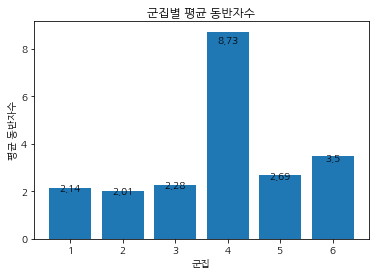

In [184]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
rects = plt.bar(pp['cluster'], pp['Q2_1'])
for i, rect in enumerate(rects):
    ax.text(rect.get_x() + rect.get_width() / 2.0, 0.95 * rect.get_height(), str(fluctuations[i]), ha='center')
plt.xlabel("군집")
plt.ylabel("평균 동반자수")
plt.title("군집별 평균 동반자수")
plt.show()

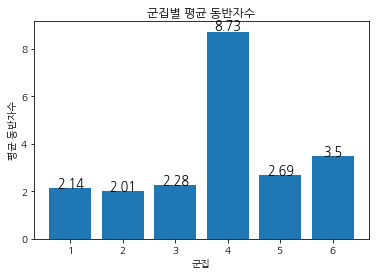

In [205]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
rects = plt.bar(pp['cluster'], pp['Q2_1'])
for i, rect in enumerate(rects):
    ax.text(rect.get_x()+rect.get_width()*0.5, rect.get_height()*1.01 , str(fluctuations[i]),ha='center', fontsize = 12.7)
plt.xlabel("군집")
plt.ylabel("평균 동반자수")
plt.title("군집별 평균 동반자수")
plt.show()

In [153]:
da = pd.DataFrame(cl[cl['cluster'] == 4]['Q2_1'].value_counts()/cl[cl['cluster'] == 4]['Q2_1'].size*100).reset_index()

In [155]:
da['Q2_1'] = round(da['Q2_1'],2)

In [162]:
da1 = da.head(6)

In [163]:
da1

,index,Q2_1
0,2.0,25.16
1,4.0,15.36
2,3.0,14.71
3,5.0,5.77
4,0.0,4.79
5,6.0,4.36


In [208]:
fluctuations = [da1['Q2_1'][0], da1['Q2_1'][1], da1['Q2_1'][2], da1['Q2_1'][3], da1['Q2_1'][4], da1['Q2_1'][5]]

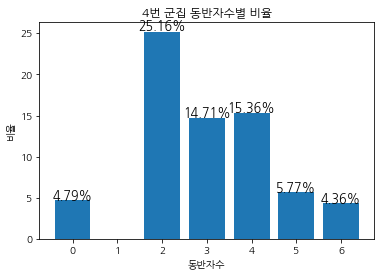

In [219]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
rects = plt.bar(da1['index'], da1['Q2_1'])
for i, rect in enumerate(rects):
    ax.text(rect.get_x()+rect.get_width()*0.5, rect.get_height()*1.01 , str(fluctuations[i]) + '%',ha='center', fontsize = 12.5)
plt.xlabel("동반자수")
plt.ylabel("비율")
plt.title("4번 군집 동반자수별 비율")
plt.show()

In [ ]:
dong = pd.DataFrame({"cluster":["군집1","군집2","군집3","군집4","군집5","군집6"],"동반자4명비율":["7.313997","2.981896","8.350558","15.359477",""]})

In [160]:
for i in range(1,7) :
    display(cl[cl['cluster'] == i]['Q2_1'].value_counts()/cl[cl['cluster'] == i]['Q2_1'].size*100)

2.0      38.650694
0.0      34.174023
3.0      11.979823
4.0       7.313997
5.0       2.963430
6.0       2.080706
7.0       1.008827
8.0       0.630517
10.0      0.315259
11.0      0.189155
9.0       0.157629
15.0      0.126103
16.0      0.063052
19.0      0.063052
13.0      0.063052
12.0      0.063052
500.0     0.031526
18.0      0.031526
14.0      0.031526
23.0      0.031526
61.0      0.031526
Name: Q2_1, dtype: float64

0.0      60.773873
2.0      21.902733
3.0       5.431310
4.0       2.981896
5.0       1.916933
10.0      0.958466
6.0       0.851970
8.0       0.638978
7.0       0.532481
20.0      0.461484
11.0      0.354988
12.0      0.354988
9.0       0.283990
16.0      0.212993
40.0      0.212993
14.0      0.212993
18.0      0.177494
30.0      0.177494
50.0      0.141995
15.0      0.141995
23.0      0.106496
17.0      0.106496
19.0      0.106496
35.0      0.070998
13.0      0.070998
88.0      0.070998
22.0      0.070998
21.0      0.070998
32.0      0.070998
28.0      0.070998
39.0      0.035499
37.0      0.035499
25.0      0.035499
100.0     0.035499
31.0      0.035499
38.0      0.035499
26.0      0.035499
24.0      0.035499
58.0      0.035499
44.0      0.035499
60.0      0.035499
41.0      0.035499
54.0      0.035499
Name: Q2_1, dtype: float64

2.0     49.483258
0.0     21.620504
3.0     14.138074
4.0      8.350558
5.0      2.687061
6.0      1.529558
9.0      0.372055
8.0      0.372055
10.0     0.330715
7.0      0.248036
30.0     0.124018
11.0     0.124018
12.0     0.124018
16.0     0.082679
15.0     0.082679
35.0     0.041339
48.0     0.041339
14.0     0.041339
24.0     0.041339
13.0     0.041339
23.0     0.041339
50.0     0.041339
36.0     0.041339
Name: Q2_1, dtype: float64

2.0      25.163399
4.0      15.359477
3.0      14.705882
5.0       5.773420
0.0       4.793028
6.0       4.357298
8.0       2.832244
20.0      2.614379
10.0      2.505447
7.0       1.851852
30.0      1.851852
14.0      1.742919
15.0      1.307190
16.0      1.089325
9.0       1.089325
12.0      1.089325
11.0      0.871460
18.0      0.871460
19.0      0.871460
21.0      0.762527
24.0      0.653595
25.0      0.544662
23.0      0.544662
27.0      0.544662
13.0      0.544662
38.0      0.435730
17.0      0.326797
26.0      0.326797
34.0      0.326797
22.0      0.326797
80.0      0.326797
40.0      0.326797
120.0     0.217865
94.0      0.217865
36.0      0.217865
35.0      0.217865
50.0      0.217865
33.0      0.217865
37.0      0.217865
45.0      0.108932
200.0     0.108932
29.0      0.108932
60.0      0.108932
41.0      0.108932
75.0      0.108932
46.0      0.108932
44.0      0.108932
39.0      0.108932
31.0      0.108932
52.0      0.108932
28.0      0.108932
70.0      0.108932
87.0      0.

2.0     35.163862
0.0     19.929141
3.0     17.626218
4.0     15.677591
5.0      6.023029
6.0      3.100089
7.0      0.531444
8.0      0.531444
10.0     0.354296
15.0     0.265722
11.0     0.177148
24.0     0.088574
13.0     0.088574
14.0     0.088574
20.0     0.088574
30.0     0.088574
80.0     0.088574
9.0      0.088574
Name: Q2_1, dtype: float64

2.0     40.366972
0.0     16.330275
3.0     14.678899
4.0     11.743119
5.0      4.403670
6.0      2.935780
8.0      2.752294
7.0      1.467890
9.0      0.917431
16.0     0.550459
10.0     0.550459
39.0     0.366972
11.0     0.366972
40.0     0.366972
13.0     0.366972
30.0     0.366972
12.0     0.366972
41.0     0.183486
22.0     0.183486
25.0     0.183486
20.0     0.183486
35.0     0.183486
21.0     0.183486
Name: Q2_1, dtype: float64

In [ ]:
plt.figure(figsize=(7,7))
plt.pie(sa1['Q9_2A1'], labels = sa1['index'], autopct='%1.1f%%', shadow=True)
plt.title("3번 군집 내 가장 만족한 활동")
plt.show()

In [6]:
cl[cl['cluster'] == 2]['Q10_1A1'].value_counts()

1.0    2020
0.0     797
Name: Q10_1A1, dtype: int64

In [156]:
for i in range(1,7) :
    display(cl[cl['cluster'] == i]['D_MON'].value_counts()/cl[cl['cluster'] == i]['D_MON'].size*100)

2     9.899117
11    8.795712
6     8.764187
9     8.669609
12    8.448928
8     8.448928
3     8.322825
1     8.102144
5     8.007566
7     7.912989
10    7.313997
4     7.313997
Name: D_MON, dtype: float64

4     10.720625
1     10.046148
12     8.413206
3      8.342208
7      8.093717
9      7.880724
6      7.880724
10     7.845225
11     7.809727
8      7.667732
2      7.667732
5      7.632233
Name: D_MON, dtype: float64

9     9.094667
5     9.094667
8     8.887970
7     8.846631
3     8.846631
10    8.639934
4     8.350558
11    8.226540
6     7.730467
1     7.689128
2     7.358413
12    7.234394
Name: D_MON, dtype: float64

2     12.527233
12    10.675381
3     10.021786
1      9.694989
10     8.496732
11     8.169935
5      7.843137
6      7.734205
4      6.971678
8      6.535948
7      5.882353
9      5.446623
Name: D_MON, dtype: float64

9     10.451727
10     9.565988
12     9.211692
8      9.211692
11     8.945970
5      8.680248
6      8.591674
1      8.148804
7      7.971656
2      7.351639
4      6.023029
3      5.845881
Name: D_MON, dtype: float64

9     10.642202
7      9.724771
12     9.357798
10     8.990826
5      8.990826
6      8.807339
11     8.073394
8      8.073394
4      8.073394
3      6.972477
2      6.238532
1      6.055046
Name: D_MON, dtype: float64

#### 2번 군집은 4월에 여행하는 비율이 가장 높고, 나머지 군집은 2월과 9월에 여행하는 비율이 높다.

In [12]:
for i in range(1,8) :
    display(df[df['cluster'] == i]['Q6_3A1'].value_counts()/df[df['cluster'] == i]['Q6_3A1'].size*100)

1     35.005171
2     22.078594
3     11.633919
5     10.392968
4      7.187177
98     4.343330
9      3.102378
8      2.430196
6      2.430196
7      0.879007
10     0.517063
Name: Q6_3A1, dtype: float64

1     30.131881
2     24.598624
3     14.736239
4     10.321101
5      8.342890
7      4.415138
9      2.494266
6      1.748853
8      1.318807
98     0.946101
10     0.946101
Name: Q6_3A1, dtype: float64

2     31.806616
1     20.636132
5     16.208651
3      9.058524
9      6.081425
98     5.979644
8      3.155216
4      2.900763
6      1.882952
10     1.450382
7      0.839695
Name: Q6_3A1, dtype: float64

1     32.767857
2     22.946429
3     10.357143
5      8.660714
4      7.678571
9      5.982143
98     4.017857
8      2.589286
6      2.321429
7      1.428571
10     1.250000
Name: Q6_3A1, dtype: float64

1     29.451138
2     26.706827
5     14.658635
3     14.323963
4      4.417671
6      3.681392
9      3.614458
7      1.740295
8      0.870147
10     0.334672
98     0.200803
Name: Q6_3A1, dtype: float64

1     43.295019
2     25.798212
5      9.706258
3      9.067688
4      2.937420
9      2.554278
8      2.043423
6      2.043423
10     1.149425
7      0.766284
98     0.638570
Name: Q6_3A1, dtype: float64

1     41.715116
2     24.273256
3     10.901163
5      9.883721
4      4.360465
9      2.180233
8      2.180233
6      2.180233
7      1.598837
10     0.436047
98     0.290698
Name: Q6_3A1, dtype: float64

#### 한국 여행 준비 중 가장 필요했던 정보의 경우 2번 군집은 이동거리 및 교통편의 정보를 가장 많이 선택했고, 나머지 군집은 방문지 정보를 가장 많이 선택했다.

In [158]:
for i in range(1,7) :
    display(cl[cl['cluster'] == i]['Q8A1'].value_counts()/cl[cl['cluster'] == i]['Q8A1'].size*100)

1     58.543506
6     22.856242
2      7.156368
7      3.625473
5      2.490542
3      1.576293
4      1.481715
8      0.977301
98     0.662043
9      0.630517
Name: Q8A1, dtype: float64

1     60.596379
6     16.932907
2      8.484203
7      5.892794
98     2.307419
5      1.668442
3      1.348953
4      0.993965
9      0.958466
8      0.816471
Name: Q8A1, dtype: float64

1     77.428690
2      8.267879
5      5.663497
6      3.100455
8      1.736255
3      1.074824
7      0.950806
4      0.744109
98     0.620091
9      0.413394
Name: Q8A1, dtype: float64

1     62.200436
9     10.130719
2      8.932462
5      6.427015
6      3.812636
8      3.159041
7      1.960784
3      1.633987
4      1.307190
98     0.435730
Name: Q8A1, dtype: float64

1     72.896368
9      7.085917
2      5.934455
5      4.340124
8      2.657219
6      2.391497
3      1.948627
4      1.771479
7      0.708592
98     0.265722
Name: Q8A1, dtype: float64

1    74.495413
2    11.009174
5     5.137615
6     3.486239
8     2.752294
3     1.651376
4     0.917431
7     0.550459
Name: Q8A1, dtype: float64

#### 다른 군집에 비해 3번 군집이 방한 중 한국 관련 정보를 스마트폰으로 부터 얻는 비율이 가장 높고, 다른 군집에 비해 1번 군집은 스마트폰을 선택한 비율이 58.5%로 상대적으로 낮다.

In [141]:
sa = pd.DataFrame(cl[cl['cluster'] == 3]['Q9_2A1'].value_counts()/cl[cl['cluster'] == 3]['Q9_2A1'].size*100).reset_index()
sa = sa.replace(1,"식도락 관광")
sa = sa.replace(2, "쇼핑")
sa = sa.replace(9, "공연, 민속, 행사, 축제 관람 및 참가")
sa = sa.replace(4, "고궁/역사 유적지 방문")
sa = sa.replace(3, "자연경관 감상")
sa = sa.replace(10, "기타")

In [142]:
sa

,index,Q9_2A1
0,식도락 관광,36.585366
1,쇼핑,30.301778
2,"공연, 민속, 행사, 축제 관람 및 참가",7.151716
3,고궁/역사 유적지 방문,7.069037
4,자연경관 감상,5.456800
5,기타,2.811079
6,7,1.901612
7,16,1.736255
8,5,1.240182
9,6,1.198842


In [143]:
sa.loc[5, 'Q9_2A1'] = 13.435303844563867

In [145]:
sa1 = sa.iloc[:6,:]

In [146]:
sa1

,index,Q9_2A1
0,식도락 관광,36.585366
1,쇼핑,30.301778
2,"공연, 민속, 행사, 축제 관람 및 참가",7.151716
3,고궁/역사 유적지 방문,7.069037
4,자연경관 감상,5.456800
5,기타,13.435304


In [136]:
sa['Q9_2A1'][5]+sa['Q9_2A1'][6]+sa['Q9_2A1'][7]+sa['Q9_2A1'][8]+sa['Q9_2A1'][9]+sa['Q9_2A1'][10]+sa['Q9_2A1'][11]+sa['Q9_2A1'][12]+sa['Q9_2A1'][13]+sa['Q9_2A1'][14]+sa['Q9_2A1'][15]+sa['Q9_2A1'][16]+sa['Q9_2A1'][17]+sa['Q9_2A1'][18]+sa['Q9_2A1'][19]+sa['Q9_2A1'][20]

13.435303844563867

In [128]:
sa

,index,Q9_2A1
0,식도락 관광,36.585366
1,쇼핑,30.301778
2,"공연, 민속, 행사, 축제 관람 및 참가",7.151716
3,고궁/역사 유적지 방문,7.069037
4,자연경관 감상,5.456800
5,10,2.811079
6,7,1.901612
7,16,1.736255
8,5,1.240182
9,6,1.198842


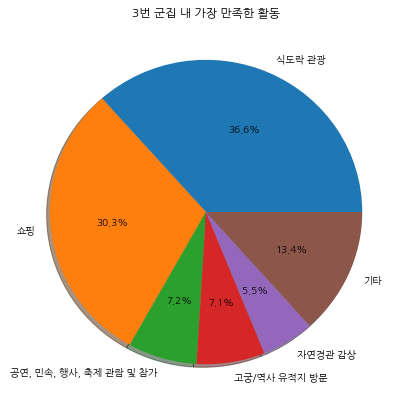

In [147]:
plt.figure(figsize=(7,7))
plt.pie(sa1['Q9_2A1'], labels = sa1['index'], autopct='%1.1f%%', shadow=True)
plt.title("3번 군집 내 가장 만족한 활동")
plt.show()

In [70]:
display(cl[cl['cluster'] == 3]['Q9_2A1'].value_counts()/cl[cl['cluster'] == 3]['Q9_2A1'].size*100)

1     36.585366
2     30.301778
9      7.151716
4      7.069037
3      5.456800
10     2.811079
7      1.901612
16     1.736255
5      1.240182
6      1.198842
11     0.992146
17     0.992146
18     0.868127
8      0.496073
12     0.413394
19     0.289376
14     0.206697
13     0.124018
20     0.082679
15     0.041339
98     0.041339
Name: Q9_2A1, dtype: float64

In [3]:
df88 = pd.read_csv("cluster17.csv")

In [4]:
df88.head()

,Unnamed: 0,Q1,Q2_1,Q5_1,Q5_2A1,Q6_1A1,Q6_3A1,Q10_1A1,Q10_1A2,Q10_1A3,...,Q10_1A15,Q10_1A16,Q10_1A17,Q10_3A1,Q13,D_COU,D_GEN,D_AGE,D_MON,cluster
0,1-1,-0.379497,-0.691371,1,1,5,5,1,0,0,...,0,0,0,-0.161105,1,13,1,3,1,1
1,2-1,-0.379497,0.803331,1,3,6,2,1,0,0,...,0,0,0,-0.458341,1,2,1,5,2,1
2,3-1,0.288003,-0.691371,1,8,2,3,1,0,0,...,0,0,0,-0.458341,1,2,2,2,3,2
3,4-1,-0.245997,-0.691371,1,2,11,1,1,0,0,...,0,0,0,0.284749,1,2,2,2,4,1
4,5-1,-0.112497,0.055980,1,1,6,3,1,0,0,...,0,0,0,-0.384032,1,2,2,3,5,2


In [25]:
df88 = df88.rename(columns = {'Unnamed: 0': 'newID'})

In [26]:
df88.head()

,newID,Q1,Q2_1,Q5_1,Q5_2A1,Q6_1A1,Q6_3A1,Q10_1A1,Q10_1A2,Q10_1A3,...,Q10_1A15,Q10_1A16,Q10_1A17,Q10_3A1,Q13,D_COU,D_GEN,D_AGE,D_MON,cluster
0,1-1,-0.379497,-0.691371,1,1,5,5,1,0,0,...,0,0,0,-0.161105,1,13,1,3,1,1
1,2-1,-0.379497,0.803331,1,3,6,2,1,0,0,...,0,0,0,-0.458341,1,2,1,5,2,1
2,3-1,0.288003,-0.691371,1,8,2,3,1,0,0,...,0,0,0,-0.458341,1,2,2,2,3,2
3,4-1,-0.245997,-0.691371,1,2,11,1,1,0,0,...,0,0,0,0.284749,1,2,2,2,4,1
4,5-1,-0.112497,0.055980,1,1,6,3,1,0,0,...,0,0,0,-0.384032,1,2,2,3,5,2


In [28]:
df = pd.merge(df88, fr2, on='newID', how='left')

In [29]:
df.head()

,newID,Q1,Q2_1,Q5_1,Q5_2A1,Q6_1A1,Q6_3A1,Q10_1A1,Q10_1A2,Q10_1A3,...,Q10_3A1,Q13,D_COU,D_GEN,D_AGE,D_MON,cluster,Q9_2A1,Q10_5A1,Q11A1
0,1-1,-0.379497,-0.691371,1,1,5,5,1,0,0,...,-0.161105,1,13,1,3,1,1,10,7,14
1,2-1,-0.379497,0.803331,1,3,6,2,1,0,0,...,-0.458341,1,2,1,5,2,1,1,1,1
2,3-1,0.288003,-0.691371,1,8,2,3,1,0,0,...,-0.458341,1,2,2,2,3,2,1,3,1
3,4-1,-0.245997,-0.691371,1,2,11,1,1,0,0,...,0.284749,1,2,2,2,4,1,1,5,1
4,5-1,-0.112497,0.055980,1,1,6,3,1,0,0,...,-0.384032,1,2,2,3,5,2,1,1,1


In [32]:
df = df.drop('newID', axis = 1)

In [35]:
df.head()

,Q1,Q2_1,Q5_1,Q5_2A1,Q6_1A1,Q6_3A1,Q10_1A1,Q10_1A2,Q10_1A3,Q10_1A4,...,Q10_3A1,Q13,D_COU,D_GEN,D_AGE,D_MON,cluster,Q9_2A1,Q10_5A1,Q11A1
0,-0.379497,-0.691371,1,1,5,5,1,0,0,0,...,-0.161105,1,13,1,3,1,1,10,7,14
1,-0.379497,0.803331,1,3,6,2,1,0,0,0,...,-0.458341,1,2,1,5,2,1,1,1,1
2,0.288003,-0.691371,1,8,2,3,1,0,0,0,...,-0.458341,1,2,2,2,3,2,1,3,1
3,-0.245997,-0.691371,1,2,11,1,1,0,0,0,...,0.284749,1,2,2,2,4,1,1,5,1
4,-0.112497,0.055980,1,1,6,3,1,0,0,0,...,-0.384032,1,2,2,3,5,2,1,1,1


In [37]:
for i in range(1,8) :
    display(df[df['cluster'] == i]['Q9_2A1'].value_counts()/df[df['cluster'] == i]['Q9_2A1'].size*100)

1     29.110651
2     24.146846
4     12.978283
3     12.668046
5      3.257497
10     3.154085
9      2.792141
6      2.430196
7      2.119959
17     1.602896
18     1.189245
19     0.879007
8      0.879007
20     0.879007
12     0.620476
16     0.465357
11     0.413650
13     0.206825
14     0.155119
15     0.051706
Name: Q9_2A1, dtype: float64

2     30.848624
1     30.619266
4      8.944954
3      7.482798
9      6.450688
10     3.153670
17     2.064220
7      1.720183
5      1.404817
6      1.376147
16     1.118119
20     0.745413
12     0.716743
11     0.688073
18     0.688073
8      0.630734
14     0.516055
13     0.401376
19     0.344037
15     0.057339
98     0.028670
Name: Q9_2A1, dtype: float64

13    49.516539
2     10.865140
1     10.203562
4      6.590331
3      5.979644
14     4.452926
9      1.653944
6      1.603053
10     1.603053
5      1.450382
18     1.145038
15     1.094148
7      0.687023
20     0.661578
12     0.610687
8      0.585242
19     0.432570
16     0.330789
17     0.279898
11     0.254453
Name: Q9_2A1, dtype: float64

2     23.839286
1     19.464286
3     15.267857
4     14.642857
7      4.910714
10     4.285714
5      3.214286
6      2.053571
9      1.875000
17     1.875000
8      1.696429
18     1.607143
19     1.339286
20     1.160714
12     0.803571
11     0.625000
14     0.625000
13     0.446429
16     0.267857
Name: Q9_2A1, dtype: float64

3     21.218206
1     19.611780
2     17.001339
4     13.319946
10     5.354752
9      4.484605
12     3.949130
8      2.744311
5      2.141901
7      1.807229
19     1.405622
6      1.405622
18     1.271754
16     1.070950
17     1.004016
11     0.803213
20     0.602410
14     0.401606
13     0.334672
15     0.066934
Name: Q9_2A1, dtype: float64

3     19.540230
2     19.412516
1     14.942529
4     12.005109
18     7.662835
20     6.385696
7      5.363985
10     5.236271
9      2.171137
11     1.277139
8      1.277139
19     1.149425
6      1.149425
5      0.766284
12     0.638570
17     0.638570
16     0.383142
Name: Q9_2A1, dtype: float64

1     31.831395
3     28.633721
2     16.715116
4      6.831395
10     2.761628
8      2.616279
7      2.034884
19     1.744186
6      1.744186
9      1.453488
5      1.017442
11     0.726744
12     0.581395
17     0.290698
18     0.290698
20     0.290698
14     0.145349
13     0.145349
16     0.145349
Name: Q9_2A1, dtype: float64

#### 1, 4번 군집은 쇼핑에, 2번 군집은 업무수행에, 3, 6번 군집은 식도락 관광, 5번 군집은 자연경관 감상에 가장 만족했다.

In [10]:
for i in range(1,8) :
    display(df[df['cluster'] == i]['Q5_1'].value_counts()/df[df['cluster'] == i]['Q5_1'].size*100)

1    99.948294
3     0.051706
Name: Q5_1, dtype: float64

1    99.225917
2     0.516055
4     0.114679
3     0.086009
5     0.057339
Name: Q5_1, dtype: float64

2    87.124682
3    10.203562
1     1.348601
4     0.737913
5     0.585242
Name: Q5_1, dtype: float64

1    99.910714
3     0.089286
Name: Q5_1, dtype: float64

1    98.527443
2     0.736278
3     0.401606
4     0.200803
5     0.133869
Name: Q5_1, dtype: float64

1    99.872286
2     0.127714
Name: Q5_1, dtype: float64

1    99.127907
4     0.726744
3     0.145349
Name: Q5_1, dtype: float64

#### 다른 군집들(여가, 위락, 휴가)과 다르게 2번 군집은 주요 방한 목적이 사업 또는 전문활동이다.

In [40]:
for i in range(1,8) :
    display(df[df['cluster'] == i]['D_MON'].value_counts()/df[df['cluster'] == i]['D_MON'].size*100)

7     9.565667
3     9.565667
8     8.893485
5     8.841779
4     8.738366
1     8.634953
6     8.531541
11    8.014478
9     7.911065
10    7.652534
12    7.238883
2     6.411582
Name: D_MON, dtype: float64

9     9.375000
8     9.231651
3     8.658257
5     8.629587
4     8.600917
7     8.486239
1     8.371560
11    8.285550
10    7.970183
6     7.912844
12    7.482798
2     6.995413
Name: D_MON, dtype: float64

1     10.381679
4     10.254453
12     8.524173
3      8.422392
7      8.269720
5      8.167939
6      7.989822
10     7.964377
8      7.659033
9      7.608142
11     7.582697
2      7.175573
Name: D_MON, dtype: float64

11    11.428571
9     10.625000
10     9.285714
6      9.285714
5      9.107143
7      8.392857
12     7.767857
2      7.142857
1      6.875000
8      6.696429
4      6.696429
3      6.696429
Name: D_MON, dtype: float64

9     11.244980
12     9.103079
11     9.103079
8      9.036145
5      8.969210
10     8.902276
7      8.567604
6      7.965194
4      7.228916
2      6.693440
3      6.626506
1      6.559572
Name: D_MON, dtype: float64

2     23.243934
12    11.111111
10     9.578544
11     7.918263
3      7.790549
6      7.662835
1      7.407407
9      7.151980
4      6.896552
5      4.214559
8      3.703704
7      3.320562
Name: D_MON, dtype: float64

7     10.319767
9     10.174419
8      9.447674
6      9.447674
12     8.866279
10     8.866279
5      8.575581
3      7.412791
11     7.122093
4      6.976744
2      6.395349
1      6.395349
Name: D_MON, dtype: float64

In [38]:
for i in range(1,8) :
    display(df[df['cluster'] == i]['Q10_5A1'].value_counts()/df[df['cluster'] == i]['Q10_5A1'].size*100)

1    58.841779
5    12.823164
3    11.582213
7     8.634953
2     4.860393
4     1.809721
9     0.879007
8     0.361944
6     0.206825
Name: Q10_5A1, dtype: float64

1    56.479358
3    12.413991
5    11.697248
7    10.579128
2     4.730505
4     2.723624
9     0.860092
6     0.315367
8     0.200688
Name: Q10_5A1, dtype: float64

1    78.295165
6     5.216285
2     4.402036
5     3.765903
3     3.689567
7     1.806616
4     1.501272
8     1.170483
9     0.152672
Name: Q10_5A1, dtype: float64

1    41.071429
5    30.446429
3    11.160714
2     7.410714
7     5.089286
4     2.500000
9     1.696429
8     0.535714
6     0.089286
Name: Q10_5A1, dtype: float64

1    61.178046
3    16.532798
2     7.630522
5     6.157965
7     5.622490
4     2.610442
8     0.200803
6     0.066934
Name: Q10_5A1, dtype: float64

1    52.618135
3    22.222222
7    12.132822
5     5.619413
2     4.214559
4     2.937420
8     0.127714
6     0.127714
Name: Q10_5A1, dtype: float64

1    74.854651
3     9.302326
2     6.831395
7     4.215116
5     2.616279
4     1.744186
8     0.290698
6     0.145349
Name: Q10_5A1, dtype: float64

In [39]:
for i in range(1,8) :
    display(df[df['cluster'] == i]['Q11A1'].value_counts()/df[df['cluster'] == i]['Q11A1'].size*100)

1      47.466391
4      10.806618
10      9.358842
3       6.463289
14      5.222337
5       3.774560
2       3.360910
8       1.654602
13      1.085832
6       1.034126
7       0.982420
9       0.827301
12      0.568769
57      0.568769
80      0.361944
107     0.361944
206     0.310238
63      0.310238
16      0.258532
83      0.258532
43      0.206825
78      0.206825
112     0.206825
214     0.155119
74      0.155119
77      0.155119
462     0.155119
11      0.155119
108     0.103413
49      0.103413
         ...    
253     0.051706
485     0.051706
256     0.051706
40      0.051706
280     0.051706
223     0.051706
41      0.051706
46      0.051706
213     0.051706
212     0.051706
210     0.051706
209     0.051706
208     0.051706
229     0.051706
204     0.051706
203     0.051706
109     0.051706
235     0.051706
104     0.051706
102     0.051706
99      0.051706
664     0.051706
236     0.051706
73      0.051706
70      0.051706
237     0.051706
222     0.051706
58      0.0517

1      45.154817
10     11.955275
3       7.998853
4       7.912844
5       3.583716
14      3.526376
2       2.723624
13      2.178899
6       1.634174
8       0.888761
12      0.860092
80      0.716743
57      0.659404
7       0.602064
9       0.573394
11      0.458716
78      0.401376
27      0.344037
107     0.315367
40      0.315367
352     0.315367
34      0.286697
83      0.258028
43      0.229358
38      0.172018
391     0.172018
100     0.172018
79      0.172018
25      0.143349
15      0.143349
         ...    
301     0.028670
323     0.028670
361     0.028670
415     0.028670
443     0.028670
483     0.028670
487     0.028670
633     0.028670
205     0.028670
203     0.028670
103     0.028670
97      0.028670
206     0.028670
208     0.028670
216     0.028670
224     0.028670
240     0.028670
286     0.028670
360     0.028670
398     0.028670
442     0.028670
462     0.028670
662     0.028670
663     0.028670
37      0.028670
49      0.028670
67      0.028670
69      0.0286

1      20.381679
14      9.109415
4       7.709924
107     3.918575
6       3.715013
3       3.715013
61      3.384224
2       2.748092
10      2.722646
5       2.646310
78      2.340967
16      2.035623
57      1.806616
7       1.755725
68      1.221374
9       1.043257
8       1.043257
106     1.043257
108     0.966921
73      0.916031
34      0.890585
100     0.814249
76      0.788804
27      0.763359
15      0.712468
13      0.661578
98      0.661578
60      0.661578
63      0.661578
43      0.636132
         ...    
483     0.025445
39      0.025445
37      0.025445
33      0.025445
554     0.025445
234     0.025445
236     0.025445
238     0.025445
240     0.025445
246     0.025445
262     0.025445
270     0.025445
274     0.025445
288     0.025445
308     0.025445
354     0.025445
558     0.025445
29      0.025445
560     0.025445
572     0.025445
662     0.025445
698     0.025445
998     0.025445
669     0.025445
609     0.025445
749     0.025445
21      0.025445
23      0.0254

1      26.071429
4       6.339286
3       5.178571
62      4.642857
10      4.553571
63      3.571429
16      3.392857
5       3.303571
15      3.125000
61      3.125000
14      2.946429
73      2.142857
2       1.964286
60      1.428571
107     1.428571
18      1.250000
17      1.160714
76      1.071429
72      1.071429
64      1.071429
70      0.982143
68      0.982143
80      0.892857
8       0.803571
75      0.714286
74      0.714286
20      0.714286
6       0.714286
301     0.625000
19      0.625000
         ...    
566     0.089286
446     0.089286
412     0.089286
312     0.089286
212     0.089286
309     0.089286
564     0.089286
306     0.089286
303     0.089286
223     0.089286
219     0.089286
575     0.089286
482     0.089286
560     0.089286
101     0.089286
110     0.089286
96      0.089286
27      0.089286
28      0.089286
33      0.089286
92      0.089286
38      0.089286
42      0.089286
82      0.089286
48      0.089286
79      0.089286
576     0.089286
71      0.0892

107    23.025435
1      14.524766
112     6.157965
108     6.024096
109     5.287818
2       4.886212
83      4.618474
4       4.417671
10      3.413655
57      3.279786
110     2.476573
3       2.342704
5       1.740295
92      1.137885
111     1.070950
14      0.937082
43      0.803213
13      0.736278
8       0.736278
93      0.736278
100     0.669344
77      0.669344
96      0.535475
99      0.401606
63      0.401606
105     0.334672
86      0.334672
742     0.334672
78      0.334672
230     0.334672
         ...    
18      0.133869
71      0.133869
692     0.133869
89      0.133869
94      0.133869
95      0.133869
97      0.133869
256     0.066934
464     0.066934
12      0.066934
253     0.066934
711     0.066934
16      0.066934
51      0.066934
24      0.066934
29      0.066934
32      0.066934
40      0.066934
41      0.066934
50      0.066934
52      0.066934
60      0.066934
68      0.066934
72      0.066934
82      0.066934
84      0.066934
85      0.066934
91      0.0669

80     25.159642
1      21.328225
78     10.217114
4       6.641124
62      4.214559
77      4.086845
10      3.575990
81      3.575990
72      3.575990
14      1.915709
3       1.660281
2       1.660281
6       1.021711
5       1.021711
63      0.893997
57      0.766284
79      0.766284
82      0.638570
8       0.638570
64      0.510856
108     0.510856
9       0.383142
61      0.383142
606     0.383142
107     0.383142
67      0.255428
603     0.255428
73      0.255428
7       0.255428
604     0.255428
13      0.255428
109     0.127714
602     0.127714
565     0.127714
413     0.127714
230     0.127714
212     0.127714
203     0.127714
110     0.127714
26      0.127714
23      0.127714
32      0.127714
42      0.127714
43      0.127714
49      0.127714
58      0.127714
75      0.127714
74      0.127714
68      0.127714
65      0.127714
66      0.127714
Name: Q11A1, dtype: float64

57     80.813953
1       5.668605
4       2.180233
10      1.598837
107     1.453488
3       1.453488
14      0.872093
108     0.581395
5       0.581395
2       0.436047
83      0.436047
62      0.436047
109     0.436047
80      0.290698
6       0.290698
8       0.290698
7       0.145349
9       0.145349
110     0.145349
49      0.145349
15      0.145349
17      0.145349
43      0.145349
112     0.145349
61      0.145349
63      0.145349
64      0.145349
68      0.145349
92      0.145349
104     0.145349
224     0.145349
Name: Q11A1, dtype: float64

In [11]:
for i in range(1,8) :
    display(df[df['cluster'] == i]['Q6_1A1'].value_counts()/df[df['cluster'] == i]['Q6_1A1'].size*100)

1     37.331954
6     25.542916
2     12.512927
11     7.187177
5      6.308170
3      4.808687
4      1.964840
8      1.861427
7      1.758014
9      0.620476
10     0.103413
Name: Q6_1A1, dtype: float64

1     33.600917
6     26.318807
2     18.663991
3      7.970183
5      3.956422
4      2.952982
11     2.207569
7      2.150229
9      1.118119
8      0.917431
10     0.143349
Name: Q6_1A1, dtype: float64

1     29.287532
6     25.979644
11    18.778626
2     11.297710
3      3.129771
4      3.078880
5      2.977099
9      2.468193
8      1.348601
7      1.221374
10     0.432570
Name: Q6_1A1, dtype: float64

6     40.892857
1     24.821429
2     11.160714
11     6.250000
3      5.714286
5      3.482143
8      2.321429
4      2.321429
7      1.964286
9      0.982143
10     0.089286
Name: Q6_1A1, dtype: float64

1     38.755020
2     22.891566
6     22.222222
3      6.358768
5      2.409639
7      2.208835
4      1.740295
11     1.673360
8      0.803213
9      0.736278
10     0.200803
Name: Q6_1A1, dtype: float64

1     42.273308
6     22.988506
2     11.621967
3      9.578544
5      7.407407
7      1.660281
4      1.532567
9      1.404853
11     0.766284
10     0.383142
8      0.383142
Name: Q6_1A1, dtype: float64

1     39.534884
2     22.529070
6     18.750000
5      6.250000
3      4.796512
4      3.488372
7      2.906977
9      0.726744
8      0.581395
11     0.436047
Name: Q6_1A1, dtype: float64

#### 다른 군집들(인터넷)과는 다르게 1번 군집은 한국 여행 전 정보를 친구, 친지, 동료로부터 얻는다.

In [9]:
cl[cl['cluster'] == 2]['Q5_2A1'].value_counts()

0.0     2809
4.0        5
17.0       2
16.0       1
Name: Q5_2A1, dtype: int64

In [7]:
for i in range(1,7) :
    display(cl[cl['cluster'] == i]['Q5_2A1'].value_counts()/cl[cl['cluster'] == i]['Q5_2A1'].size*100)

4.0     31.052963
1.0     19.861286
2.0     14.880202
3.0      8.165195
5.0      5.359395
14.0     4.350567
17.0     4.350567
10.0     1.544767
7.0      1.513241
9.0      1.481715
6.0      1.134931
12.0     1.134931
13.0     1.103405
8.0      1.008827
15.0     0.977301
11.0     0.819672
16.0     0.756620
0.0      0.504414
Name: Q5_2A1, dtype: float64

0.0     99.716010
4.0      0.177494
17.0     0.070998
16.0     0.035499
Name: Q5_2A1, dtype: float64

1.0     33.608929
2.0     31.707317
9.0      9.384043
3.0      4.960728
5.0      4.257958
4.0      3.968582
14.0     2.852418
8.0      1.694915
12.0     1.405539
17.0     1.198842
10.0     1.116164
7.0      0.909467
13.0     0.868127
6.0      0.620091
16.0     0.496073
15.0     0.496073
11.0     0.372055
0.0      0.082679
Name: Q5_2A1, dtype: float64

1.0     25.381264
2.0     23.856209
3.0     20.152505
5.0      7.080610
14.0     5.119826
17.0     2.941176
9.0      2.287582
15.0     1.960784
8.0      1.633987
7.0      1.633987
6.0      1.633987
13.0     1.525054
4.0      1.307190
0.0      1.198257
16.0     0.980392
12.0     0.653595
11.0     0.326797
10.0     0.326797
Name: Q5_2A1, dtype: float64

1.0     26.040744
3.0     18.511957
2.0     12.843224
5.0      8.503100
4.0      8.148804
14.0     5.403012
8.0      3.897254
13.0     3.188663
12.0     2.657219
9.0      2.480071
6.0      1.948627
16.0     1.594331
10.0     1.240035
11.0     0.797166
15.0     0.797166
7.0      0.708592
17.0     0.708592
0.0      0.531444
Name: Q5_2A1, dtype: float64

1.0     42.568807
3.0     27.522936
2.0     11.376147
14.0     5.137615
4.0      3.853211
5.0      3.302752
8.0      1.100917
9.0      1.100917
0.0      1.100917
13.0     0.917431
6.0      0.733945
15.0     0.733945
7.0      0.366972
16.0     0.183486
Name: Q5_2A1, dtype: float64

#### 2번 군집은 한국 방문 선택시 고려하는 요인이 대부분의 경우 없다. => 비즈니스 목적 예상

#### 대부분 음식/미식 탐방을 고려요인으로 선택한다. 그리고 1번 군집은 친구, 친지 방문을 고려요인으로 선택한다.

In [10]:
for i in range(1,7) :
    display(cl[cl['cluster'] == i]['Q13'].value_counts()/cl[cl['cluster'] == i]['Q13'].size*100)

1    96.122320
3     1.986129
2     1.891551
Name: Q13, dtype: float64

1    94.107206
3     4.437345
2     1.455449
Name: Q13, dtype: float64

1    80.074411
2    17.941298
3     1.984291
Name: Q13, dtype: float64

3    94.335512
1     3.594771
2     2.069717
Name: Q13, dtype: float64

1    71.922055
3    24.092117
2     3.985828
Name: Q13, dtype: float64

1    85.321101
3    13.577982
2     1.100917
Name: Q13, dtype: float64

#### 4번 군집은 여행 형태 중 단체 여행의 비율이 94.3%로 가장 높다.

In [11]:
for i in range(1,7) :
    display(cl[cl['cluster'] == i]['Q10_5A1'].value_counts()/cl[cl['cluster'] == i]['Q10_5A1'].size*100)

1    51.071879
5    19.924338
3    11.790668
7     7.440101
2     5.926860
4     2.648172
9     0.630517
8     0.315259
6     0.252207
Name: Q10_5A1, dtype: float64

1    78.984736
6     5.111821
2     4.330848
5     3.372382
3     3.265886
7     1.845935
4     1.632943
8     1.206958
9     0.248491
Name: Q10_5A1, dtype: float64

1    67.217859
3    11.947086
7     9.921455
2     4.133940
5     3.472509
4     2.439024
9     0.661430
8     0.124018
6     0.082679
Name: Q10_5A1, dtype: float64

1    92.701525
2     2.941176
3     2.832244
7     0.871460
4     0.435730
5     0.217865
Name: Q10_5A1, dtype: float64

1    71.567759
3    13.640390
2     5.668733
7     3.631532
5     3.365810
4     1.860053
8     0.177148
6     0.088574
Name: Q10_5A1, dtype: float64

1    78.348624
3     7.889908
2     5.688073
7     4.403670
4     1.834862
5     1.284404
8     0.366972
6     0.183486
Name: Q10_5A1, dtype: float64

#### 이용 숙박 시설의 경우 모든 군집은 호텔을 이용하는 비율이 가장 높지만 1번 군집은 다른 군집들에 비해 호텔을 선택하는 비율은 51%로 낮고 다른 군집에 비해 친척 또는 친구집에 숙박하는 비율이 높다.

In [12]:
for i in range(1,7) :
    display(cl[cl['cluster'] == i]['Q11A1'].value_counts()/cl[cl['cluster'] == i]['Q11A1'].size*100)

1      32.786885
4       8.953342
10      6.431274
80      5.044136
3       4.981084
14      3.499369
5       3.121059
2       2.805801
78      2.648172
107     1.765448
62      1.702396
57      1.607818
63      1.387137
8       1.261034
16      0.945776
61      0.945776
13      0.851198
15      0.851198
77      0.819672
81      0.819672
6       0.788146
72      0.756620
83      0.693569
7       0.630517
108     0.504414
73      0.504414
9       0.472888
12      0.441362
74      0.378310
70      0.346784
         ...    
41      0.031526
85      0.031526
210     0.031526
412     0.031526
312     0.031526
306     0.031526
256     0.031526
554     0.031526
558     0.031526
562     0.031526
224     0.031526
222     0.031526
218     0.031526
214     0.031526
574     0.031526
576     0.031526
51      0.031526
602     0.031526
204     0.031526
663     0.031526
662     0.031526
106     0.031526
664     0.031526
692     0.031526
98      0.031526
31      0.031526
37      0.031526
39      0.0315

1      21.441250
14      8.910188
4       7.525737
107     3.691871
6       3.691871
3       3.372382
61      3.017394
78      2.804402
2       2.697906
10      2.449414
5       2.342918
16      2.271920
57      2.200923
7       1.668442
106     1.100461
68      1.100461
108     1.064963
8       0.993965
9       0.958466
76      0.887469
98      0.816471
27      0.780973
73      0.780973
100     0.780973
15      0.745474
34      0.745474
18      0.709975
60      0.638978
63      0.638978
13      0.603479
         ...    
71      0.035499
65      0.035499
669     0.035499
51      0.035499
246     0.035499
256     0.035499
262     0.035499
270     0.035499
274     0.035499
282     0.035499
288     0.035499
306     0.035499
310     0.035499
354     0.035499
442     0.035499
552     0.035499
554     0.035499
560     0.035499
608     0.035499
662     0.035499
696     0.035499
698     0.035499
746     0.035499
745     0.035499
21      0.035499
23      0.035499
33      0.035499
37      0.0354

1      50.806118
10     13.642001
3       7.193055
4       7.110376
14      3.431170
5       3.100455
2       2.604382
13      2.190988
6       1.860273
8       0.909467
9       0.785449
12      0.702770
80      0.620091
7       0.578752
11      0.413394
107     0.289376
57      0.248036
100     0.206697
110     0.124018
63      0.124018
64      0.124018
112     0.082679
34      0.082679
81      0.082679
61      0.082679
83      0.082679
60      0.082679
62      0.082679
556     0.082679
92      0.082679
         ...    
216     0.041339
606     0.041339
280     0.041339
286     0.041339
247     0.041339
237     0.041339
219     0.041339
207     0.041339
203     0.041339
109     0.041339
85      0.041339
79      0.041339
77      0.041339
73      0.041339
67      0.041339
55      0.041339
45      0.041339
43      0.041339
37      0.041339
17      0.041339
285     0.041339
293     0.041339
487     0.041339
998     0.041339
666     0.041339
253     0.041339
574     0.041339
486     0.0413

1      39.215686
80     16.122004
62      8.823529
4       5.446623
3       5.010893
57      3.703704
77      2.832244
81      2.287582
5       2.287582
10      2.178649
78      1.742919
2       1.416122
14      1.198257
74      0.871460
72      0.871460
108     0.544662
64      0.435730
79      0.435730
7       0.435730
63      0.435730
15      0.326797
6       0.326797
8       0.326797
9       0.326797
61      0.326797
60      0.326797
16      0.217865
66      0.217865
107     0.217865
65      0.217865
17      0.108932
43      0.108932
73      0.108932
52      0.108932
75      0.108932
93      0.108932
99      0.108932
67      0.108932
Name: Q11A1, dtype: float64

107    22.674934
1      11.514615
83      8.945970
112     7.528787
108     5.668733
109     5.403012
2       3.897254
4       3.365810
110     3.188663
92      3.011515
93      2.480071
10      2.302923
57      2.037201
111     1.948627
3       1.771479
5       0.797166
43      0.797166
13      0.708592
78      0.708592
8       0.620018
14      0.620018
96      0.620018
99      0.531444
77      0.531444
100     0.531444
97      0.442870
103     0.442870
98      0.354296
101     0.354296
86      0.354296
         ...    
749     0.088574
106     0.088574
16      0.088574
15      0.088574
12      0.088574
441     0.088574
24      0.088574
464     0.088574
482     0.088574
665     0.088574
711     0.088574
746     0.088574
19      0.088574
34      0.088574
73      0.088574
38      0.088574
41      0.088574
95      0.088574
45      0.088574
46      0.088574
48      0.088574
49      0.088574
50      0.088574
91      0.088574
89      0.088574
62      0.088574
64      0.088574
66      0.0885

57     80.550459
1       6.238532
10      2.752294
4       1.651376
3       1.467890
109     0.917431
107     0.917431
14      0.917431
108     0.733945
2       0.550459
5       0.550459
6       0.550459
62      0.366972
9       0.183486
7       0.183486
230     0.183486
17      0.183486
110     0.183486
64      0.183486
77      0.183486
78      0.183486
83      0.183486
43      0.183486
Name: Q11A1, dtype: float64

#### 가장 인상 깊었던 방문지의 경우 다른 군집(명동/남대문/북창)과 다르게 5번 군집은 해운대 일대를, 6번 군집은 제주를 선택한 비율이 가장 높았다.

In [196]:
pop = pd.read_csv("2018_pop_real.csv", engine = 'python')

In [197]:
pop.head()

,act_mean,rest_mean,sleep_mean,SIDO_NM,SGNG_NM,ADONG_NM
0,*,*,*,경상북도,울진군,죽변면
1,*,*,*,경상남도,고성군,하일면
2,*,*,*,전라남도,해남군,문내면
3,*,*,*,전라남도,신안군,압해읍
4,*,*,*,서울특별시,성북구,안암동


In [198]:
pop = pop.replace("*", 2.5)

In [199]:
pop.head()

,act_mean,rest_mean,sleep_mean,SIDO_NM,SGNG_NM,ADONG_NM
0,2.5,2.5,2.5,경상북도,울진군,죽변면
1,2.5,2.5,2.5,경상남도,고성군,하일면
2,2.5,2.5,2.5,전라남도,해남군,문내면
3,2.5,2.5,2.5,전라남도,신안군,압해읍
4,2.5,2.5,2.5,서울특별시,성북구,안암동


In [200]:
pop.to_csv("pop.csv", index = False)

In [201]:
pd.read_csv("pop.csv")

,act_mean,rest_mean,sleep_mean,SIDO_NM,SGNG_NM,ADONG_NM
0,2.500000,2.500000,2.500000,경상북도,울진군,죽변면
1,2.500000,2.500000,2.500000,경상남도,고성군,하일면
2,2.500000,2.500000,2.500000,전라남도,해남군,문내면
3,2.500000,2.500000,2.500000,전라남도,신안군,압해읍
4,2.500000,2.500000,2.500000,서울특별시,성북구,안암동
5,2.500000,2.500000,2.500000,대전광역시,대덕구,덕암동
6,2.500000,2.500000,2.500000,전라남도,고흥군,도양읍
7,2.500000,2.500000,2.500000,전라남도,여수시,문수동
8,2.500000,2.500000,2.500000,경상북도,예천군,예천읍
9,2.500000,2.500000,2.500000,전라남도,진도군,지산면


In [180]:
mean = pd.read_csv("2017_mean_real.csv", engine = 'python')

In [181]:
mean.head()

,mean,SIDO_NM,SGNG_NM,ADONG_NM
0,3.855476e+08,서울특별시,종로구,사직동
1,3.577824e+08,서울특별시,종로구,사직동
2,2.795896e+08,서울특별시,종로구,사직동
3,4.944128e+08,서울특별시,종로구,사직동
4,1.920250e+09,서울특별시,종로구,사직동


In [195]:
pop.head()

,act_mean,rest_mean,sleep_mean,SIDO_NM,SGNG_NM,ADONG_NM
0,2.5,2.5,2.5,경상북도,울진군,죽변면
1,2.5,2.5,2.5,경상남도,고성군,하일면
2,2.5,2.5,2.5,전라남도,해남군,문내면
3,2.5,2.5,2.5,전라남도,신안군,압해읍
4,2.5,2.5,2.5,서울특별시,성북구,안암동


In [202]:
wm = []
for d, h in zip(pop['SIDO_NM'], pop['SGNG_NM']):
    if d == "강원도" and h =="고성군":
        x = "강릉고성군"
        wm.append(x)
    elif d == "경상남도" and h =="고성군":
        x = "경상남도고성군"
        wm.append(x)
    else :
        x = h
        wm.append(x)
pop['new_nm'] = wm

In [203]:
pop.head()

,act_mean,rest_mean,sleep_mean,SIDO_NM,SGNG_NM,ADONG_NM,new_nm
0,2.5,2.5,2.5,경상북도,울진군,죽변면,울진군
1,2.5,2.5,2.5,경상남도,고성군,하일면,경상남도고성군
2,2.5,2.5,2.5,전라남도,해남군,문내면,해남군
3,2.5,2.5,2.5,전라남도,신안군,압해읍,신안군
4,2.5,2.5,2.5,서울특별시,성북구,안암동,성북구


In [205]:
wm = []
for d, h in zip(mean['SIDO_NM'], mean['SGNG_NM']):
    if d == "강원도" and h =="고성군":
        x = "강릉고성군"
        wm.append(x)
    elif d == "경상남도" and h =="고성군":
        x = "경상남도고성군"
        wm.append(x)
    else :
        x = h
        wm.append(x)
mean['new_nm'] = wm

In [208]:
pop=pop.drop('SGNG_NM', axis = 1)

In [212]:
pop = pop.rename(columns = {'new_nm': 'SGNG_NM'})

In [221]:
pop.head()

,act_mean,rest_mean,sleep_mean,SIDO_NM,ADONG_NM,SGNG_NM
0,2.5,2.5,2.5,경상북도,죽변면,울진군
1,2.5,2.5,2.5,경상남도,하일면,경상남도고성군
2,2.5,2.5,2.5,전라남도,문내면,해남군
3,2.5,2.5,2.5,전라남도,압해읍,신안군
4,2.5,2.5,2.5,서울특별시,안암동,성북구


In [238]:
pop['act_mean'] = pop['act_mean'].astype('float')
pop['rest_mean'] = pop['rest_mean'].astype('float')
pop['sleep_mean'] = pop['sleep_mean'].astype('float')

In [239]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97465 entries, 0 to 97464
Data columns (total 6 columns):
act_mean      97465 non-null float64
rest_mean     97465 non-null float64
sleep_mean    97465 non-null float64
SIDO_NM       97465 non-null object
ADONG_NM      97465 non-null object
SGNG_NM       97465 non-null object
dtypes: float64(3), object(3)
memory usage: 4.5+ MB


In [245]:
pop = pop.groupby(['SIDO_NM','SGNG_NM'])['act_mean', 'rest_mean','sleep_mean'].mean().reset_index()

In [246]:
pop.head()

,SIDO_NM,SGNG_NM,act_mean,rest_mean,sleep_mean
0,강원도,강릉고성군,286.173590,71.977922,75.029260
1,강원도,강릉시,183.816456,55.117209,37.348818
2,강원도,동해시,119.234556,36.493826,30.516735
3,강원도,삼척시,190.512509,46.862926,45.247552
4,강원도,속초시,186.510360,67.164832,38.295308


In [214]:
mean=mean.drop('SGNG_NM', axis = 1)

In [215]:
mean = mean.rename(columns = {'new_nm': 'SGNG_NM'})

In [248]:
mean = mean.groupby(['SIDO_NM','SGNG_NM'])['mean'].mean().reset_index()

In [249]:
mean.head()

,SIDO_NM,SGNG_NM,mean
0,강원도,강릉고성군,3.204241e+08
1,강원도,강릉시,5.417454e+08
2,강원도,동해시,3.824904e+08
3,강원도,삼척시,2.889137e+08
4,강원도,속초시,5.841823e+08


In [256]:
pop.shape

(250, 5)

In [254]:
mer = pd.merge(pop, mean, on = ['SIDO_NM','SGNG_NM'])

In [257]:
mer.head()

,SIDO_NM,SGNG_NM,act_mean,rest_mean,sleep_mean,mean
0,강원도,강릉고성군,286.173590,71.977922,75.029260,3.204241e+08
1,강원도,강릉시,183.816456,55.117209,37.348818,5.417454e+08
2,강원도,동해시,119.234556,36.493826,30.516735,3.824904e+08
3,강원도,삼척시,190.512509,46.862926,45.247552,2.889137e+08
4,강원도,속초시,186.510360,67.164832,38.295308,5.841823e+08


In [259]:
mer[mer['SGNG_NM'] == "성남시 수정구"]

,SIDO_NM,SGNG_NM,act_mean,rest_mean,sleep_mean,mean
32,경기도,성남시 수정구,128.20912,57.929025,46.784692,2.825726e+08


In [260]:
len(mer['SGNG_NM'])

250

In [219]:
re = pd.read_csv("region_total.csv", engine = 'python')

In [258]:
re.head()

,SIDO_NM,SGNG_NM,지하철역,기차역,지역축제,숙박업소,주차장,관광예산,해시태그,2017_사업체수,2017_종사자수,2017_소비자물가지수,자연휴양림,문화재,입장객수,공항수,면세점개수,쇼핑장소개수,버스터미널개수,병원수
0,강원도,강릉시,0,4,4,385,101,6.326100e+10,2254990,140071,614742,105.42,2,129,2790413,0,0,0,52,97
1,강원도,강릉고성군,0,1,1,81,5,6.326100e+10,312854,140071,614742,105.42,0,18,1372363,0,0,0,52,97
2,전라남도,강진군,0,0,5,35,8,2.361000e+11,74161,153308,709121,104.94,1,57,2064367,0,0,0,51,190
3,경기도,가평군,0,4,0,276,9,4.464400e+10,1306986,878283,4936144,105.03,3,21,3740644,0,0,0,45,677
4,강원도,동해시,0,6,0,117,28,6.326100e+10,893011,140071,614742,105.42,0,22,857739,0,0,0,52,97


In [261]:
writer = pd.ExcelWriter('merge.xlsx', engine='xlsxwriter')

In [262]:
mer.to_excel(writer, sheet_name='Sheet1')

In [263]:
writer.close()

In [2]:
mer2 = pd.read_csv("merge2.csv")

In [5]:
mer2[mer2['SIDO_NM'] == "세종특별자치시"]

,SIDO_NM,SGNG_NM,act_mean,rest_mean,sleep_mean,mean,new_nm
165,세종특별자치시,세종특별자치시,410.438542,161.101421,118.314499,292633446.0,세종특별자치시


In [110]:
data = pd.read_csv("cluster_final.csv")

In [111]:
data.head(20)

,newID,cluster,I_Q14_1T,I_Q14_2_3,I_Q14_2_4,I_Q14_2_5,I_Q14_2_7,GA_Q14_2_1T,GA_Q14_2_3,GA_Q14_2_4,GA_Q14_2_5,GA_Q14_2_7
0,10-1201,1,511.70,176.30,64.50,43.00,8.60,NaN,NaN,NaN,NaN,NaN
1,1-1005,2,463.58,178.30,26.75,44.58,0.00,NaN,NaN,NaN,NaN,NaN
2,3-2839,2,850.00,0.00,100.00,100.00,0.00,NaN,NaN,NaN,NaN,NaN
3,5-87,2,840.00,100.80,336.00,33.60,0.00,NaN,NaN,NaN,NaN,NaN
4,2-117,3,3425.76,3172.00,158.60,63.44,6.34,NaN,NaN,NaN,NaN,NaN
5,7-818,2,1185.75,0.00,255.00,382.50,0.00,NaN,NaN,NaN,NaN,NaN
6,2-1457,3,12557.59,2747.83,1831.89,641.16,0.00,NaN,NaN,NaN,NaN,NaN
7,9-79,1,1111.12,438.60,146.20,73.10,43.86,NaN,NaN,NaN,NaN,NaN
8,6-2172,4,NaN,NaN,NaN,NaN,NaN,991.38,254.2,152.52,0.0,0.0
9,11-3209,5,633.70,177.26,177.26,88.63,13.29,NaN,NaN,NaN,NaN,NaN


In [99]:
data1 = data.loc[:,["cluster","GA_Q14_2_1T","GA_Q14_2_3","GA_Q14_2_4","GA_Q14_2_5","GA_Q14_2_7"]]

In [100]:
data1.head()

,cluster,GA_Q14_2_1T,GA_Q14_2_3,GA_Q14_2_4,GA_Q14_2_5,GA_Q14_2_7
0,1,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN
3,2,NaN,NaN,NaN,NaN,NaN
4,3,NaN,NaN,NaN,NaN,NaN


In [101]:
data1 = data1.dropna()

In [102]:
data1.shape

(2053, 6)

In [103]:
data1.head()

,cluster,GA_Q14_2_1T,GA_Q14_2_3,GA_Q14_2_4,GA_Q14_2_5,GA_Q14_2_7
8,4,991.38,254.2,152.52,0.0,0.0
16,4,3625.20,2736.0,171.00,34.2,0.0
20,4,1966.64,951.6,63.44,0.0,0.0
27,5,1327.62,654.0,49.05,0.0,32.7
33,4,552.50,227.5,0.00,0.0,0.0


In [9]:
data1.groupby(['cluster'])[['GA_Q14_2_1T']].mean().sort_values(by='cluster',ascending=True).reset_index()

,cluster,GA_Q14_2_1T
0,1,1761.485366
1,2,1241.062651
2,3,1022.344087
3,4,2341.298621
4,5,1109.794574
5,6,1173.558500


In [121]:
data2 = data.loc[:,["cluster","I_Q14_2_3","I_Q14_2_4"]]

In [124]:
data2.head()

,cluster,I_Q14_2_3,I_Q14_2_4
0,1,176.3,64.50
1,2,178.3,26.75
2,2,0.0,100.00
3,2,100.8,336.00
4,3,3172.0,158.60


In [123]:
data2 = data2.dropna()

#### 단체 + Air-tel의 1인 지출 경비는 4번 군집(2341.3)이 가장 높고, 3번 군집(1022.3)이 가장 낮다.

In [118]:
data2.isnull().sum()

cluster         0
I_Q14_2_3    2053
dtype: int64

In [125]:
data2.groupby(['cluster'])[['I_Q14_2_3']].mean().sort_values(by='cluster',ascending=True).reset_index()

,cluster,I_Q14_2_3
0,1,668.223208
1,2,513.146552
2,3,1096.468761
3,4,1360.659091
4,5,399.172623
5,6,748.176796


In [10]:
df1 = data1[data1['GA_Q14_2_3']!= 0]

In [104]:
df1.groupby(['cluster'])[['GA_Q14_2_3']].mean().sort_values(by='cluster',ascending=True).reset_index()

,cluster,GA_Q14_2_3
0,1,480.955537
1,2,386.337211
2,3,395.473403
3,4,826.007642
4,5,423.957070
5,6,516.716494


#### 단체 + Air-tel의 1인 지출 경비 (쇼핑비)는 4번 군집(826)이 가장 높고, 2번 군집(386.3)이 가장 낮다.

In [45]:
df2 = data1[data1['GA_Q14_2_4']!= 0]

In [46]:
df2.groupby(['cluster'])[['GA_Q14_2_4']].mean().sort_values(by='cluster',ascending=True).reset_index()

,cluster,GA_Q14_2_4
0,1,212.968043
1,2,218.738496
2,3,112.744339
3,4,144.400853
4,5,70.654214
5,6,132.247632


#### 단체 + Air-tel의 1인 지출 경비 (식음료비)는 2번 군집(218.7)이 가장 높고, 5번 군집(70.7)이 가장 낮다.

In [12]:
df3 = data1[data1['GA_Q14_2_5']!= 0]

In [14]:
d1 = df3.groupby(['cluster'])[['GA_Q14_2_5']].mean().sort_values(by='cluster',ascending=True).reset_index()

In [174]:
d1['GA_Q14_2_5'] = round(d1['GA_Q14_2_5'],2)

In [82]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager, rc
from matplotlib import style

In [175]:
d1['GA_Q14_2_5'][0]

120.26

In [220]:
fluctuations = [d1['GA_Q14_2_5'][0], d1['GA_Q14_2_5'][1], d1['GA_Q14_2_5'][2], d1['GA_Q14_2_5'][3], d1['GA_Q14_2_5'][4], d1['GA_Q14_2_5'][5]]

In [221]:
for i, rect in enumerate(rects):
    ax.text(rect.get_x()+rect.get_width()*0.5, rect.get_height()*1.01 , str(fluctuations[i]),ha='center',fontsize=13)

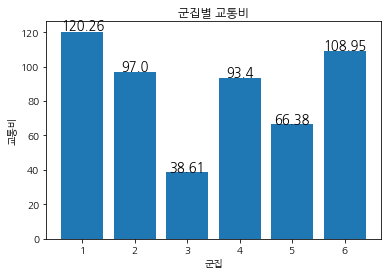

In [222]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
rects = plt.bar(d1['cluster'], d1['GA_Q14_2_5'])
for i, rect in enumerate(rects):
    ax.text(rect.get_x()+rect.get_width()*0.5, rect.get_height()*1.01 , str(fluctuations[i]),ha='center',fontsize=13)
plt.xlabel("군집")
plt.ylabel("교통비")
plt.title("군집별 교통비")
plt.show()

#### 단체 + Air-tel의 1인 지출 경비 (교통비)는 1번 군집(120.3)이 가장 높고, 3번 군집(38.6)이 가장 낮다.

In [32]:
indexx = cl[-(cl['Q10_3A1']==0)].index

In [33]:
tot= cl.iloc[indexx]

In [50]:
100-sum([24.596941, 19.512195, 18.933444, 12.319140, 7.151716, 3.968582, 2.149649, 2.108309, 1.612236, 1.074824])

6.572963999999985

In [ ]:
1.612236
1.074824

In [55]:
df = pd.DataFrame({"day":["2days","4days","3days","5days","6days","7days","1days","9days","8days","10days","etc"], "percentage":[24.596941, 19.512195, 18.933444, 12.319140, 7.151716, 3.968582, 2.149649, 2.108309, 1.612236, 1.074824, 6.572963999999985]})

In [56]:
df

,day,percentage
0,2days,24.596941
1,4days,19.512195
2,3days,18.933444
3,5days,12.319140
4,6days,7.151716
5,7days,3.968582
6,1days,2.149649
7,9days,2.108309
8,8days,1.612236
9,10days,1.074824


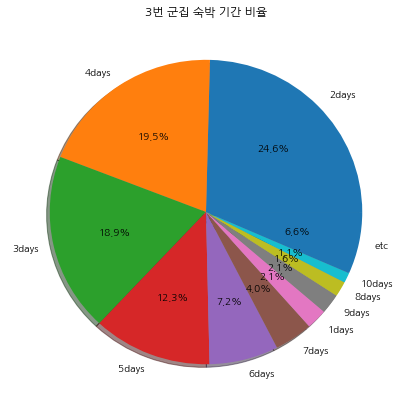

In [58]:
plt.figure(figsize=(7,7))
plt.pie(df['percentage'],labels = df['day'], autopct='%1.1f%%', shadow=True)
plt.title("3번 군집 숙박 기간 비율")
plt.show()

In [42]:
for i in range(1,7) :
    display(cl[cl['cluster'] == i]['Q10_3A1'].value_counts()/cl[cl['cluster'] == i]['Q10_3A1'].size*100)

4     16.740227
5     12.515763
3     12.358134
6      9.205549
2      8.259773
7      6.179067
8      3.625473
9      3.404792
10     3.152585
1      2.395965
14     2.206810
13     1.670870
11     1.639344
30     1.261034
12     1.261034
29     1.008827
20     0.977301
15     0.851198
60     0.725095
59     0.693569
17     0.662043
19     0.630517
0      0.630517
28     0.535939
16     0.535939
21     0.441362
26     0.346784
27     0.346784
18     0.315259
22     0.283733
        ...    
71     0.063052
57     0.063052
34     0.063052
73     0.063052
33     0.063052
47     0.063052
65     0.063052
52     0.063052
54     0.063052
56     0.063052
62     0.063052
37     0.063052
70     0.063052
76     0.063052
84     0.063052
87     0.063052
78     0.063052
81     0.031526
83     0.031526
66     0.031526
67     0.031526
36     0.031526
38     0.031526
46     0.031526
72     0.031526
82     0.031526
63     0.031526
43     0.031526
41     0.031526
89     0.031526
Name: Q10_3A1, Length: 8

3     17.571885
2     14.731984
4     13.276535
5      7.703230
6      5.892794
1      5.147320
7      4.543841
8      2.555911
10     2.484913
9      1.987930
29     1.774938
14     1.490948
11     1.384452
13     1.384452
30     1.171459
20     1.135960
60     0.993965
12     0.958466
59     0.851970
15     0.745474
21     0.709975
19     0.674476
18     0.674476
27     0.603479
89     0.603479
16     0.496983
28     0.496983
24     0.461484
22     0.461484
25     0.461484
        ...    
35     0.106496
55     0.106496
41     0.106496
53     0.106496
64     0.106496
34     0.106496
81     0.070998
75     0.070998
67     0.070998
63     0.070998
33     0.070998
39     0.070998
62     0.070998
46     0.070998
48     0.070998
68     0.070998
74     0.070998
70     0.070998
84     0.070998
38     0.035499
58     0.035499
83     0.035499
37     0.035499
47     0.035499
73     0.035499
71     0.035499
52     0.035499
82     0.035499
51     0.035499
66     0.035499
Name: Q10_3A1, Length: 8

2     24.596941
4     19.512195
3     18.933444
5     12.319140
6      7.151716
7      3.968582
1      2.149649
9      2.108309
8      1.612236
10     1.074824
13     0.785449
14     0.785449
12     0.661430
0      0.661430
11     0.496073
20     0.413394
30     0.372055
19     0.289376
15     0.248036
21     0.206697
17     0.165358
18     0.165358
29     0.124018
61     0.124018
22     0.124018
23     0.124018
60     0.124018
37     0.082679
24     0.082679
53     0.041339
51     0.041339
31     0.041339
59     0.041339
26     0.041339
16     0.041339
40     0.041339
42     0.041339
52     0.041339
88     0.041339
85     0.041339
27     0.041339
87     0.041339
Name: Q10_3A1, dtype: float64

4     43.137255
3     30.827887
5     10.566449
2      5.991285
6      4.139434
7      2.178649
11     0.544662
8      0.544662
1      0.544662
14     0.326797
10     0.326797
9      0.326797
13     0.217865
60     0.108932
16     0.108932
12     0.108932
Name: Q10_3A1, dtype: float64

4     28.609389
3     17.626218
5      9.211692
2      8.680248
6      4.871568
7      4.428698
8      3.188663
9      3.011515
10     2.834367
13     1.682905
11     1.594331
14     1.417183
12     1.417183
1      1.062888
60     0.708592
15     0.708592
16     0.708592
20     0.708592
19     0.708592
17     0.531444
18     0.531444
21     0.531444
31     0.442870
30     0.442870
28     0.442870
22     0.442870
27     0.354296
23     0.354296
37     0.265722
24     0.265722
34     0.177148
44     0.177148
29     0.177148
88     0.088574
25     0.088574
87     0.088574
79     0.088574
77     0.088574
69     0.088574
65     0.088574
61     0.088574
59     0.088574
58     0.088574
56     0.088574
55     0.088574
54     0.088574
52     0.088574
48     0.088574
43     0.088574
40     0.088574
32     0.088574
26     0.088574
Name: Q10_3A1, dtype: float64

4     20.917431
3     19.449541
2     14.311927
5      8.623853
6      7.155963
7      6.972477
9      5.688073
8      3.486239
11     2.385321
1      1.651376
12     1.651376
10     1.284404
14     1.284404
20     0.733945
13     0.550459
15     0.366972
16     0.366972
23     0.366972
28     0.366972
61     0.366972
68     0.183486
19     0.183486
21     0.183486
22     0.183486
26     0.183486
27     0.183486
30     0.183486
33     0.183486
39     0.183486
60     0.183486
85     0.183486
Name: Q10_3A1, dtype: float64

In [39]:
tot.groupby('cluster')['Q10_3A1'].value_counts()

cluster  Q10_3A1
1        4          531
         5          397
         3          392
         6          292
         2          262
         7          196
         8          115
         9          108
         10         100
         1           76
         14          70
         13          53
         11          52
         12          40
         30          40
         29          32
         20          31
         15          27
         60          23
         59          22
         17          21
         19          20
         16          17
         28          17
         21          14
         26          11
         27          11
         18          10
         22           9
         23           9
                   ... 
6        3          106
         2           78
         5           47
         6           39
         7           38
         9           31
         8           19
         11          13
         1            9
         12           9

In [34]:
tot.groupby(['cluster'])[['Q10_3A1']].mean().sort_values(by='cluster',ascending=True).reset_index()

,cluster,Q10_3A1
0,1,10.142132
1,2,11.063345
2,3,4.941323
3,4,4.040305
4,5,7.682905
5,6,6.163303


In [ ]:
data1[data1['GA_Q14_2_7']!= 0]
Q10_2_1A1

In [49]:
df4 = data1[data1['GA_Q14_2_7']!= 0]

In [50]:
df4.groupby(['cluster'])[['GA_Q14_2_7']].mean().sort_values(by='cluster',ascending=True).reset_index()

,cluster,GA_Q14_2_7
0,1,296.535714
1,2,51.474000
2,3,39.490563
3,4,138.482500
4,5,45.635714
5,6,146.630000


#### 단체 + Air-tel의 1인 지출 경비 (문화, 오락 관련 지출비)는 1번 군집(296.5)이 가장 높고, 3번 군집(39.5)이 가장 낮다.

In [52]:
rc = pd.read_csv("region_cluster.csv", engine = 'python')

In [53]:
rc.head()

,Unnamed: 0,act_mean,rest_mean,sleep_mean,sales,지하철역,기차역,지역축제,숙박업소,주차장,...,X2017_소비자물가지수,자연휴양림,문화재,입장객수,공항수,면세점개수,쇼핑장소개수,버스터미널개수,병원수,cluster
0,강원도 횡성군,1.746278,0.778234,1.133318,-0.292743,-0.186657,-0.842314,-0.243811,-0.473629,-0.458225,...,1.500912,0.177836,-0.802602,-0.619340,3.230291,-0.157841,-0.354396,0.701191,-0.882975,2
1,강원도 화천군,0.475793,-0.247230,0.498001,-0.483326,-0.186657,-0.842314,-0.243811,-0.452294,-0.171461,...,1.500912,-1.015146,-0.917310,-0.906618,-0.307647,-0.157841,-0.354396,0.701191,-0.882975,1
2,전라남도 화순군,-0.576210,-1.390082,-0.916057,0.000399,-0.186657,-0.095823,0.462551,-0.473629,-0.382317,...,0.537536,1.370817,0.057710,-0.303229,-0.307647,-0.157841,-0.354396,0.615145,-0.430751,1
3,경기도 화성시,0.656897,1.437328,2.209283,10.090903,-0.186657,-0.344653,-0.243811,0.213346,-0.407620,...,0.718169,-1.015146,-0.372446,-0.728002,-0.307647,-0.157841,-0.354396,0.098872,1.937351,3
4,강원도 홍천군,0.737958,0.077100,0.306114,-0.041900,-0.186657,-0.842314,0.563459,-0.234681,-0.466660,...,1.500912,1.370817,-0.530170,-0.853549,-0.307647,-0.157841,-0.354396,0.701191,-0.882975,2


In [60]:
m3 = pd.read_csv("merge3.csv", engine='python')

In [61]:
m3.head()

,SIDO_NM,SGNG_NM,act_mean,rest_mean,sleep_mean,sales,지하철역,기차역,지역축제,숙박업소,...,2017_종사자수,2017_소비자물가지수,자연휴양림,문화재,입장객수,공항수,면세점개수,쇼핑장소개수,버스터미널개수,병원수
0,강원도,횡성군,387.487993,87.997979,90.080049,2.794669e+08,0,0,0,49,...,614742,105.42,1,19,789702,1,0,0,52,97
1,강원도,화천군,280.041615,65.194831,76.395104,2.098401e+08,0,0,0,54,...,614742,105.42,0,11,0,0,0,0,52,97
2,전라남도,화순군,191.072467,39.781373,45.935827,3.865619e+08,0,3,7,49,...,709121,104.94,2,79,1658663,0,0,0,51,190
3,경기도,화성시,295.357761,102.654165,113.256706,4.072984e+09,0,2,0,210,...,4936144,105.03,0,49,491001,0,0,0,45,677
4,강원도,홍천군,302.213171,72.406931,72.261797,3.711089e+08,0,0,8,105,...,614742,105.42,2,38,145882,0,0,0,52,97


In [63]:
m3 = m3[m3['SIDO_NM'] != "서울특별시"]

In [64]:
m3.shape

(161, 24)

In [66]:
m3['cluster'] = rc['cluster']

In [67]:
m3.groupby(['cluster'])[['act_mean']].mean().sort_values(by='cluster',ascending=True).reset_index()

,cluster,act_mean
0,1.0,227.996514
1,2.0,302.037242
2,3.0,218.081494
3,4.0,233.825102
4,5.0,218.252160
5,6.0,179.186753


In [42]:
rr = pd.read_csv("regionregion.csv", engine = 'python')

In [44]:
rr.columns

Index(['Unnamed: 0', 'SIDO_NM', 'SGNG_NM', 'act_mean', 'rest_mean',
       'sleep_mean', 'sales', '지하철역', '기차역', '지역축제', '숙박업소', '주차장', '관광예산',
       '해시태그', '2017_사업체수', '2017_종사자수', '2017_소비자물가지수', '자연휴양림', '문화재',
       '입장객수', '공항수', '면세점개수', '쇼핑장소개수', '버스터미널개수', '병원수', 'cluster'],
      dtype='object')

In [46]:
cl.columns

Index(['newID', 'cluster', 'ID', 'D_MON', 'Q6_3A1', 'Q8A1', 'Q9_2A1',
       'Q10_1A1', 'Q10_1A2', 'Q10_1A3', 'Q10_1A4', 'Q10_1A5', 'Q10_1A6',
       'Q10_1A7', 'Q10_1A8', 'Q10_1A9', 'Q10_1A10', 'Q10_1A11', 'Q10_1A12',
       'Q10_1A13', 'Q10_1A14', 'Q10_1A15', 'Q10_1A16', 'Q10_1A17', 'Q5_1',
       'Q6_1A1', 'Q5_2A1', 'Q13', 'Q10_5A1', 'Q11A1', 'Q12_1A1', 'Q12_2A1',
       'Q1', 'Q2_1', 'Q10_3A1', 'I_Q14_1T', 'I_Q14_2_3', 'I_Q_14_2_4',
       'I_Q_14_2_5', 'I_Q_14_2_7', 'GA_Q14_1T', 'GA_Q14_2_3', 'GA_Q14_2_4',
       'GA_Q14_2_5', 'GA_Q14_2_7', 'Q19', 'D_COU', 'D_GEN', 'D_AGE'],
      dtype='object')

In [43]:
rr[rr['cluster'] == 4]['SIDO_NM'].value_counts()

충청남도    14
경상남도    14
전라북도    10
충청북도     6
Name: SIDO_NM, dtype: int64

In [114]:
rr[rr['문화재'] == 0]['cluster'].value_counts().sum()

1

In [71]:
rr.head()

,Unnamed: 0,SIDO_NM,SGNG_NM,act_mean,rest_mean,sleep_mean,sales,지하철역,기차역,지역축제,...,2017_소비자물가지수,자연휴양림,문화재,입장객수,공항수,면세점개수,쇼핑장소개수,버스터미널개수,병원수,cluster
0,0,강원도,횡성군,387.487993,87.997979,90.080049,2.794669e+08,0,0,0,...,105.42,1,19,789702,1,0,0,52,97,2
1,1,강원도,화천군,280.041615,65.194831,76.395104,2.098401e+08,0,0,0,...,105.42,0,11,0,0,0,0,52,97,1
2,2,전라남도,화순군,191.072467,39.781373,45.935827,3.865619e+08,0,3,7,...,104.94,2,79,1658663,0,0,0,51,190,1
3,3,경기도,화성시,295.357761,102.654165,113.256706,4.072984e+09,0,2,0,...,105.03,0,49,491001,0,0,0,45,677,3
4,4,강원도,홍천군,302.213171,72.406931,72.261797,3.711089e+08,0,0,8,...,105.42,2,38,145882,0,0,0,52,97,2


In [72]:
rr.columns

Index(['Unnamed: 0', 'SIDO_NM', 'SGNG_NM', 'act_mean', 'rest_mean',
       'sleep_mean', 'sales', '지하철역', '기차역', '지역축제', '숙박업소', '주차장', '관광예산',
       '해시태그', '2017_사업체수', '2017_종사자수', '2017_소비자물가지수', '자연휴양림', '문화재',
       '입장객수', '공항수', '면세점개수', '쇼핑장소개수', '버스터미널개수', '병원수', 'cluster'],
      dtype='object')

In [ ]:
'문화재', '입장객수', '공항수', '면세점개수', '쇼핑장소개수', '버스터미널개수', '병원수'

In [102]:
rr.groupby(['cluster'])[['문화재']].mean().sort_values(by='cluster',ascending=True).reset_index()

,cluster,문화재
0,1,61.591837
1,2,58.692308
2,3,36.620690
3,4,84.863636
4,5,170.000000
5,6,343.666667


#### mean) 문화재의 경우 6번 군집(343.7)이 가장 많고, 3번 군집(36.6)이 가장 적다.

In [101]:
rr.groupby(['cluster'])[['입장객수']].mean().sort_values(by='cluster',ascending=True).reset_index()

,cluster,입장객수
0,1,1.980139e+06
1,2,2.014922e+06
2,3,2.244025e+06
3,4,2.228357e+06
4,5,5.937950e+06
5,6,9.775804e+06


#### mean) 주요 관광지의 입장객수는 6번 군집(9775804)이 가장 많고, 1번 군집(1980139)이 가장 적다.

In [99]:
rr.groupby(['cluster'])[['공항수']].sum().sort_values(by='cluster',ascending=True).reset_index()

,cluster,공항수
0,1,1
1,2,2
2,3,0
3,4,1
4,5,7
5,6,3


#### sum) 공항수의 경우 5번 군집(7)이 가장 많고, 3번 군집(0)이 가장 적다.

In [94]:
rr.groupby(['cluster'])[['면세점개수']].sum().sort_values(by='cluster',ascending=True).reset_index()

,cluster,면세점개수
0,1,1
1,2,3
2,3,2
3,4,0
4,5,9
5,6,27


#### sum) 면세점의 경우 6번 군집(27)이 가장 많고, 4번 군집(0)이 가장 적다.

In [86]:
rr.groupby(['cluster'])[['쇼핑장소개수']].sum().sort_values(by='cluster',ascending=True).reset_index()

,cluster,쇼핑장소개수
0,1,2
1,2,1
2,3,27
3,4,6
4,5,18
5,6,19


#### sum) 쇼핑장소의 경우 3번 군집(27)이 가장 많고, 2번 군집(1)이 가장 적다.

In [88]:
rr.groupby(['cluster'])[['버스터미널개수']].mean().sort_values(by='cluster',ascending=True).reset_index()

,cluster,버스터미널개수
0,1,52.428571
1,2,42.000000
2,3,45.000000
3,4,40.727273
4,5,28.900000
5,6,4.333333


#### mean) 버스터미널의 경우 1번 군집(52.4)이 가장 많고, 6번 군집(4.3)이 가장 적다.

In [90]:
rr.groupby(['cluster'])[['병원수']].mean().sort_values(by='cluster',ascending=True).reset_index()

,cluster,병원수
0,1,177.734694
1,2,197.769231
2,3,677.000000
3,4,204.681818
4,5,163.600000
5,6,242.000000


#### mean) 병원의 경우 3번 군집(677)이 가장 많고, 5번 군집(163)이 가장 적다.

In [9]:
data = pd.read_csv("regionregion.csv", engine = 'python')

In [10]:
data.head()

,Unnamed: 0,SIDO_NM,SGNG_NM,act_mean,rest_mean,sleep_mean,sales,지하철역,기차역,지역축제,...,2017_소비자물가지수,자연휴양림,문화재,입장객수,공항수,면세점개수,쇼핑장소개수,버스터미널개수,병원수,cluster
0,0,강원도,횡성군,387.487993,87.997979,90.080049,2.794669e+08,0,0,0,...,105.42,1,19,789702,1,0,0,52,97,2
1,1,강원도,화천군,280.041615,65.194831,76.395104,2.098401e+08,0,0,0,...,105.42,0,11,0,0,0,0,52,97,1
2,2,전라남도,화순군,191.072467,39.781373,45.935827,3.865619e+08,0,3,7,...,104.94,2,79,1658663,0,0,0,51,190,1
3,3,경기도,화성시,295.357761,102.654165,113.256706,4.072984e+09,0,2,0,...,105.03,0,49,491001,0,0,0,45,677,3
4,4,강원도,홍천군,302.213171,72.406931,72.261797,3.711089e+08,0,0,8,...,105.42,2,38,145882,0,0,0,52,97,2


In [11]:
data.columns

Index(['Unnamed: 0', 'SIDO_NM', 'SGNG_NM', 'act_mean', 'rest_mean',
       'sleep_mean', 'sales', '지하철역', '기차역', '지역축제', '숙박업소', '주차장', '관광예산',
       '해시태그', '2017_사업체수', '2017_종사자수', '2017_소비자물가지수', '자연휴양림', '문화재',
       '입장객수', '공항수', '면세점개수', '쇼핑장소개수', '버스터미널개수', '병원수', 'cluster'],
      dtype='object')

In [16]:
con = ['SIDO_NM','지하철역','기차역','공항수','버스터미널개수']

In [17]:
df = data[con]

In [18]:
df.head()

,SIDO_NM,지하철역,기차역,공항수,버스터미널개수
0,강원도,0,0,1,52
1,강원도,0,0,0,52
2,전라남도,0,3,0,51
3,경기도,0,2,0,45
4,강원도,0,0,0,52


In [31]:
sd = df.groupby('SIDO_NM')['지하철역','기차역','공항수','버스터미널개수'].mean().reset_index()

In [32]:
sd.head()

,SIDO_NM,지하철역,기차역,공항수,버스터미널개수
0,강원도,0.000000,3.833333,0.111111,52.0
1,경기도,1.935484,3.419355,0.000000,45.0
2,경상남도,0.944444,2.277778,0.055556,38.0
3,경상북도,0.130435,4.217391,0.043478,54.0
4,광주광역시,20.000000,9.000000,1.000000,1.0


In [33]:
sd['tr'] = sd['지하철역'] + sd['기차역'] + sd['공항수'] + sd['버스터미널개수']

In [34]:
sd.head()

,SIDO_NM,지하철역,기차역,공항수,버스터미널개수,tr
0,강원도,0.000000,3.833333,0.111111,52.0,55.944444
1,경기도,1.935484,3.419355,0.000000,45.0,50.354839
2,경상남도,0.944444,2.277778,0.055556,38.0,41.277778
3,경상북도,0.130435,4.217391,0.043478,54.0,58.391304
4,광주광역시,20.000000,9.000000,1.000000,1.0,31.000000


In [35]:
sd.sort_values(by='tr',ascending=False).reset_index()

,index,SIDO_NM,지하철역,기차역,공항수,버스터미널개수,tr
0,7,부산광역시,118.000000,19.000000,1.000000,2.0,140.000000
1,5,대구광역시,88.000000,5.000000,1.000000,7.0,101.000000
2,10,인천광역시,56.000000,18.000000,1.000000,4.0,79.000000
3,3,경상북도,0.130435,4.217391,0.043478,54.0,58.391304
4,0,강원도,0.000000,3.833333,0.111111,52.0,55.944444
5,11,전라남도,0.000000,2.363636,0.090909,51.0,53.454545
6,1,경기도,1.935484,3.419355,0.000000,45.0,50.354839
7,12,전라북도,0.000000,2.571429,0.071429,46.0,48.642857
8,14,충청남도,0.000000,2.533333,0.000000,43.0,45.533333
9,2,경상남도,0.944444,2.277778,0.055556,38.0,41.277778


In [40]:
a = data.groupby('SIDO_NM')['숙박업소'].mean().reset_index()

In [41]:
a.sort_values(by='숙박업소', ascending = False).reset_index()

,index,SIDO_NM,숙박업소
0,7,부산광역시,2028.000000
1,10,인천광역시,1266.000000
2,5,대구광역시,804.000000
3,6,대전광역시,787.000000
4,9,울산광역시,724.000000
5,4,광주광역시,687.000000
6,13,제주특별자치도,655.000000
7,2,경상남도,158.111111
8,14,충청남도,149.333333
9,0,강원도,131.166667


In [30]:
data.sort_values(by='숙박업소', ascending = False).reset_index()

,index,Unnamed: 0,SIDO_NM,SGNG_NM,act_mean,rest_mean,sleep_mean,sales,지하철역,기차역,...,2017_소비자물가지수,자연휴양림,문화재,입장객수,공항수,면세점개수,쇼핑장소개수,버스터미널개수,병원수,cluster
0,106,106,부산광역시,부산광역시,189.276225,81.054144,61.965189,448045512.3,118,19,...,105.29,0,489,8628120,1,6,10,2,377,6
1,46,46,인천광역시,인천광역시,199.047539,71.024373,68.303794,407431914.0,56,18,...,104.64,1,264,7608659,1,19,2,4,158,6
2,30,30,경상남도,창원시,168.288939,72.084589,54.383536,373596116.6,0,11,...,104.09,0,251,0,0,1,3,38,310,5
3,119,119,대구광역시,대구광역시,147.625915,60.563446,40.807138,476224098.9,88,5,...,105.76,2,278,13090632,1,2,7,7,191,6
4,38,38,제주특별자치도,제주시,256.150085,89.241851,63.852465,549439493.6,0,0,...,105.80,2,230,5260316,1,6,0,2,23,5
5,118,118,대전광역시,대전광역시,117.097468,48.557298,33.445925,669985733.5,22,8,...,104.19,2,228,7082357,0,0,2,6,112,5
6,57,57,울산광역시,울산광역시,193.875515,85.162205,67.876863,584480893.0,0,11,...,103.52,1,144,5208965,1,1,3,4,95,5
7,141,141,광주광역시,광주광역시,143.761495,62.288996,41.295672,776332234.3,20,9,...,104.47,0,155,6374861,1,0,4,1,169,5
8,98,98,제주특별자치도,서귀포시,411.364501,121.324755,95.430428,599861671.7,0,0,...,105.80,2,153,9553752,0,2,0,2,23,2
9,91,91,경기도,수원시,137.963132,63.925492,43.200715,603655666.7,0,2,...,105.03,0,66,1880132,0,1,3,45,677,3


In [47]:
words = ['고양시','대구광역시','당진시','고창군','양구군','홍천군','괴산군','창원시','공주시','안산시','울산광역시','전주시','동두천시','삼척시','화순군','부산광역시','경주시','안동시','대구광역시','인천광역시','양산시','창원시','진주시','제주시','대전광역시','청주시','합천군','부여군','공주시','밀양시','부산광역시','대구광역시','광주광역시','대전광역시','울산광역시','인천광역시','전주시','창원시','청주시','수원시','경주시','천안시','포항시','구미시','여수시','인천광역시','제주시','부산광역시','대구광역시','서귀포시','평택시','양양군','군산시','울산광역시','수원시','무안군','창원시','보은군','보성군','무주군','부산광역시','대구광역시','고양시','성남시','청주시','광주광역시','창원시','울산광역시','부천시','수원시','구리시','김해시','인천광역시','대전광역시','용인시','화성시','광명시','광주광역시','김포시','대전광역시','순천시','고양시','수원시']

In [48]:
counts = dict()
for word in words :
    counts[word] = counts.get(word, 0) + 1
print(counts)
print(max(counts.values()))

{'고양시': 3, '대구광역시': 5, '당진시': 1, '고창군': 1, '양구군': 1, '홍천군': 1, '괴산군': 1, '창원시': 5, '공주시': 2, '안산시': 1, '울산광역시': 4, '전주시': 2, '동두천시': 1, '삼척시': 1, '화순군': 1, '부산광역시': 4, '경주시': 2, '안동시': 1, '인천광역시': 4, '양산시': 1, '진주시': 1, '제주시': 2, '대전광역시': 4, '청주시': 3, '합천군': 1, '부여군': 1, '밀양시': 1, '광주광역시': 3, '수원시': 4, '천안시': 1, '포항시': 1, '구미시': 1, '여수시': 1, '서귀포시': 1, '평택시': 1, '양양군': 1, '군산시': 1, '무안군': 1, '보은군': 1, '보성군': 1, '무주군': 1, '성남시': 1, '부천시': 1, '구리시': 1, '김해시': 1, '용인시': 1, '화성시': 1, '광명시': 1, '김포시': 1, '순천시': 1}
5


In [23]:
m = pd.read_csv('region_real_final_plz.csv', encoding='cp949')

In [3]:
m.head()

,SIDO_NM,SGNG_NM,관광지수,거리(km),음식점수,sales,지하철역,기차역,지역축제,숙박업소,...,해시태그,2017_소비자물가지수,자연휴양림,문화재,입장객수,공항수,면세점개수,쇼핑장소개수,버스터미널개수,유동인구
0,강원도,횡성군,45,115.84,15,2.794669e+08,0,0,0,49,...,129914,105.42,1,19,789702,1,0,0,52,188.522007
1,강원도,화천군,63,136.32,8,2.098401e+08,0,0,0,54,...,100725,105.42,0,11,0,0,0,0,52,140.543850
2,전라남도,화순군,64,315.33,8,3.865619e+08,0,3,7,49,...,166699,104.94,2,79,1658663,0,0,0,51,92.263223
3,경기도,화성시,57,55.10,7,4.072984e+09,0,2,0,210,...,427648,105.03,0,49,491001,0,0,0,45,170.422877
4,강원도,홍천군,69,105.19,14,3.711089e+08,0,0,8,105,...,341300,105.42,2,38,145882,0,0,0,52,148.960633


In [24]:
m.columns

Index(['SIDO_NM', 'SGNG_NM', '관광지수', '거리(km)', '음식점수', 'sales', '지하철역', '기차역',
       '지역축제', '숙박업소', '관광예산', '해시태그', '2017_소비자물가지수', '자연휴양림', '문화재', '입장객수',
       '공항수', '면세점개수', '쇼핑장소개수', '버스터미널개수', '유동인구'],
      dtype='object')

### 3번 군집
#### 쇼핑장소, 면세점수, 지하철역, 해시태그 많은 곳
#### 서울과의 거리 가까운 곳

In [17]:
# 많은 곳 찾을 땐 ascending=False
m1 = m.sort_values(['쇼핑장소개수'], ascending=False).head(15).SGNG_NM
m2 = m.sort_values(['면세점개수'], ascending=False).head(15).SGNG_NM
m3 = m.sort_values(['지하철역'], ascending=False).head(15).SGNG_NM
m4 = m.sort_values(['해시태그'], ascending=False).head(15).SGNG_NM
m5 = m.sort_values(['음식점수'], ascending=False).head(15).SGNG_NM
# 적은 곳 찾을 땐 ascending=True
m6 = m.sort_values(['거리(km)'], ascending=True).head(15).SGNG_NM

In [18]:
result = pd.concat([m1,m2,m3,m4,m5,m6], axis=0).value_counts().head(10).reset_index()
result.rename(columns={'index': 'SGNG_NM', 'SGNG_NM': 'value'}, inplace=True)
pd.merge(m.iloc[:,0:2], result, on='SGNG_NM').sort_values('value',ascending=False)

,SIDO_NM,SGNG_NM,value
1,인천광역시,인천광역시,6
5,부산광역시,부산광역시,5
7,대구광역시,대구광역시,5
0,경상남도,창원시,4
2,울산광역시,울산광역시,4
6,대전광역시,대전광역시,4
8,광주광역시,광주광역시,4
3,경기도,수원시,3
9,경기도,고양시,3
4,제주특별자치도,서귀포시,2


#### 쇼핑 소비가 압도적으로 많고, 먼 거리를 이동하지 않아도 충분히 많은 것을 즐기기를 원하는 군집이다. 따라서 쇼핑장소와 면세점개수가 많은 지역을 추천하고, 해시태그가 많아 관광객이 자주 방문할 지역을 추천한다. 또한 가까운 거리를 이동하기에 편리하게 하기 위해서 서울에서 가까운 지역과 지하철역이 많은 지역을 추천한다.

### 4번 군집
#### 소비자 물가지수 높은 곳, 면세점, 쇼핑장소 많은 곳, 지역축제 많은 곳, 해시태그 많은 곳, sales 높은 곳, 관광지 많은 곳

In [15]:
m1 = m.sort_values(['쇼핑장소개수'], ascending=False).head(15).SGNG_NM
m2 = m.sort_values(['면세점개수'], ascending=False).head(15).SGNG_NM
m3 = m.sort_values(['2017_소비자물가지수'], ascending=False).head(15).SGNG_NM
m4 = m.sort_values(['지역축제'], ascending=False).head(15).SGNG_NM
m5 = m.sort_values(['해시태그'], ascending=False).head(15).SGNG_NM
m6 = m.sort_values(['sales'], ascending=False).head(15).SGNG_NM
m7 = m.sort_values(['관광지수'], ascending=False).head(15).SGNG_NM

In [16]:
result = pd.concat([m1,m2,m3,m4,m5,m6,m7], axis=0).value_counts().head(10).reset_index()
result.rename(columns={'index': 'SGNG_NM', 'SGNG_NM': 'value'}, inplace=True)
pd.merge(m.iloc[:,0:2], result, on='SGNG_NM').sort_values('value',ascending=False)

,SIDO_NM,SGNG_NM,value
2,울산광역시,울산광역시,6
7,대구광역시,대구광역시,6
0,경상남도,창원시,5
1,인천광역시,인천광역시,4
3,경기도,수원시,4
4,제주특별자치도,서귀포시,4
5,부산광역시,부산광역시,4
6,대전광역시,대전광역시,4
8,광주광역시,광주광역시,4
9,경기도,고양시,3


#### 가족 단위의 패키지 여행객이 많은 군집으로 예상된다. 쇼핑에 만족하며 단체 쇼핑비가 가장 많은 군집이기 때문에 쇼핑장소와 면세점이 많은 지역을 추천한다. 그리고 패키지 여행은 여행지의 핫플레이스를 방문하는 것이 핵심이기 때문에 지역축제가 많고, 해시태그 수가 많으며, 관광지의 개수가 많은 지역을 추천한다. 그리고 연가구 수입이 압도적으로 많고, 지출 총액이 가장 높기 때문에 소비자 물가가 높은 지역을 추천한다. 

In [ ]:
df['newID'] = df['D_MON'].astype('int').astype('str') + '-' + df['ID'].astype('str')